<a href="https://colab.research.google.com/github/datawilly/analisis-estadistico-y-modelos-lineales/blob/main/PEC2_ROSALES_RAMIREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bloque 1: Ejercicios básicos<a id="topic2"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

### 01 Ejercicio
Un analista de deportes quiere saber si existe una relación entre la variable número de bateos que realiza un equipo de béisbol (`numero_bateos`) y la variable dependiente, número de runs que consigue, (`runs`). Para ello contáis con la base de datos $\tt beisbol$ que se aporta abajo sobre diferentes equipos de la Major League Baseball (MLB) de los EE.UU. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

In [ ]:
# Base de datos beisbol MLB
equipos = c("Texas", "Boston", "Detroit", "Kansas", "St.", "New_S.", "New_Y.", "Milwaukee", "Colorado", "Houston", "Baltimore", "Los_An.", "Chicago A", "Cincinnati", "Los_P.", "Philadelphia", "Chicago B", "Cleveland", "Arizona", "Toronto", "Minnesota", "Florida", "Pittsburgh", "Oakland", "Tampa", "Atlanta", "Washington", "San.F", "San.I", "Seattle")
numero_bateos = c(5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421)
runs = c(855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654 , 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556)
beisbol = data.frame(equipos, numero_bateos, runs)
head(beisbol)

,equipos,numero_bateos,runs
,<chr>,<dbl>,<dbl>
1,Texas,5659,855
2,Boston,5710,875
3,Detroit,5563,787
4,Kansas,5672,730
5,St.,5532,762
6,New_S.,5600,718


<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

**Exploración inicial de la base de datos**

In [ ]:
beisbol

equipos,numero_bateos,runs
<chr>,<dbl>,<dbl>
Texas,5659,855
Boston,5710,875
Detroit,5563,787
Kansas,5672,730
St.,5532,762
New_S.,5600,718
New_Y.,5518,867
Milwaukee,5447,721
Colorado,5544,735


In [ ]:
#Iniciamos conociendo la estructura de nuestra base de datos.
str(beisbol)

'data.frame':	30 obs. of  3 variables:
 $ equipos      : chr  "Texas" "Boston" "Detroit" "Kansas" ...
 $ numero_bateos: num  5659 5710 5563 5672 5532 ...
 $ runs         : num  855 875 787 730 762 718 867 721 735 615 ...


Podemos observar que está dividida en variables con 30 observaciones en total (30 filas, 3 columnas), una variable es de tipo caracter y las dos restantes son numéricas

In [ ]:
#Confirmamos la informacion anterior viendo la dimension de la base de datos
dim(beisbol)

[1] 30  3

**Visualizacion:**  
Una vez conocemos las características generales de nuestro dataframe, realizamos una exploracion de manera gráfica


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.4.2  3.4.4             FALSE



installing the source package 'ggplot2'




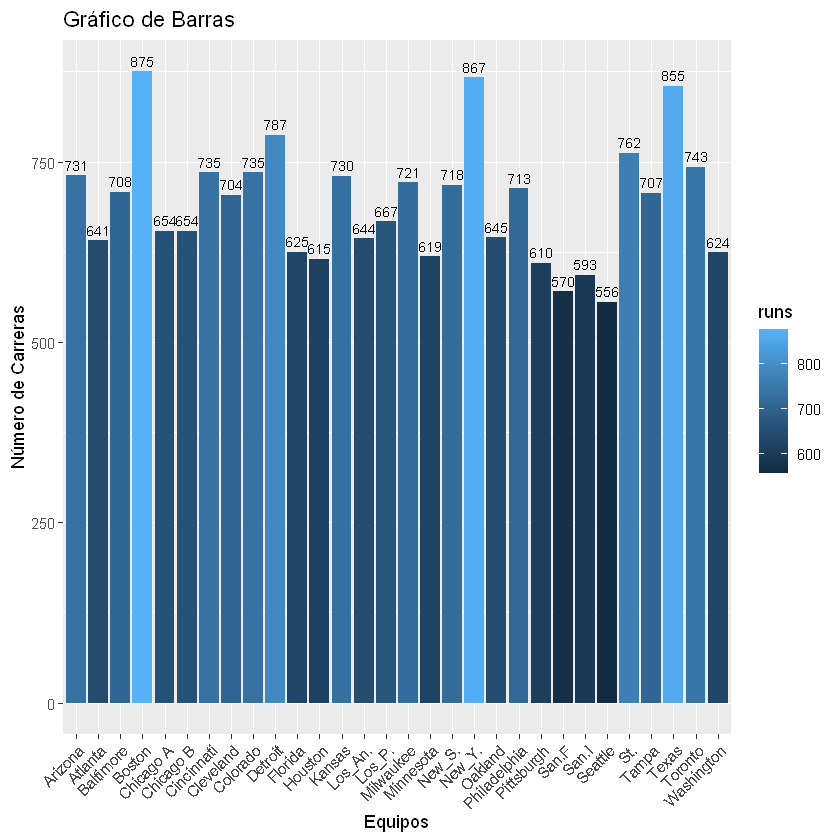

In [ ]:
#Resulta un taanto complicado, generar una visualizacion de manera adecuada con la libreria estandar
#de R por lo que vamos a usar ggplot2 que nos permite crear gráficos mas facilmente.
#Instalamos la libreria y la cargamos
install.packages("ggplot2")
library(ggplot2)

#Creamos nuestro gráfico, en este caso vamos a ver las carreras de cada equipo
grafico_barras = ggplot(beisbol, aes(x = equipos, y = runs, fill = runs)) +
#Vamos a representarlo con un gráfico de barras que van a tener como tamaño la cantidad de carreras
    geom_bar(stat = "identity") +
#Le ponemos las etiquetas a cada barra para poder ver mejor el valor que representa
    geom_text(aes(label = runs),vjust = -0.5,color = "black",size = 3) +
#Establecemos el título del gráfico y los de los ejes "x" y "y"
  labs(title = "Gráfico de Barras", x = "Equipos", y = "Número de Carreras") +
#Como no podemos ver bien los nombres de las ciudades vamos a modificar las etiquetas
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
#Mostramos el gráfico
print(grafico_barras)


A primera vista podemos clasificar a los equipos en cuatro grupos:  
        1. Menos de 500 carreras.  
        2. De 500 a 600 carreras.  
        3. De 600 a 700 carreras.  
        4. Mas de 700 carreras.  
Notamos que la mayoría de los equipos se situan en el grupo 2 y 3, siendo solo 6 equipos los que se encuentran fuera de estos grupos, 3 en el grupo 1 y 3 en el grupo 4.

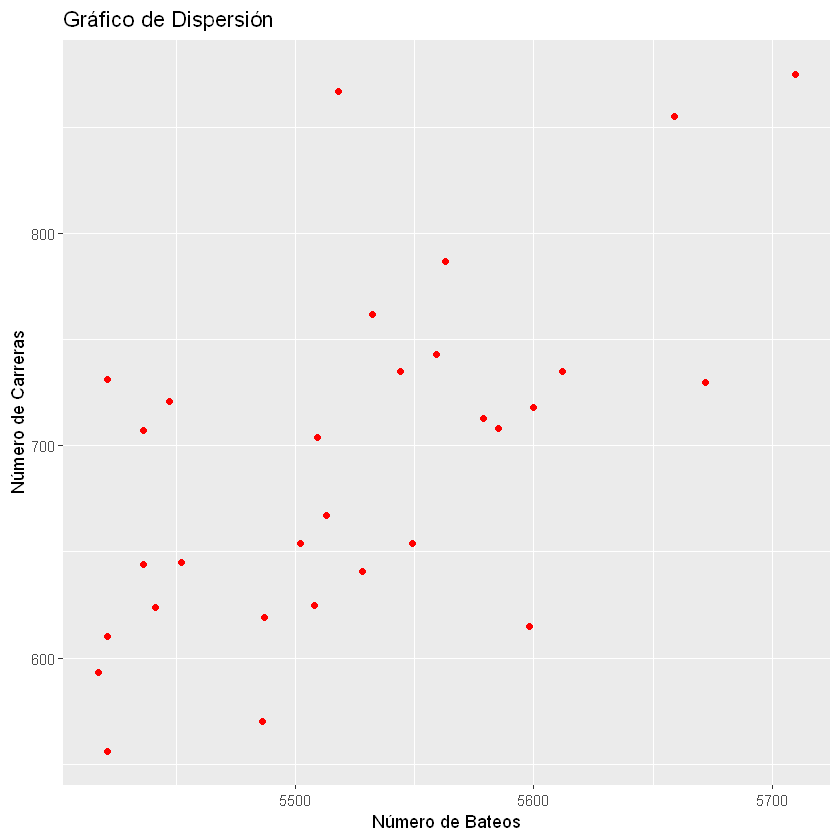

In [ ]:
#Vamos a hacer otro gráfico, esta vez de dispersion entre las carreras y el número de bateos
grafico_dispersion = ggplot(beisbol, aes(x = numero_bateos, y = runs)) +
#Establecemos que el gráfico va a ser de dispersión
  geom_point(color = "red") +
#Declaramos los títulos del gráfico, y de los ejes "x" y "y"
  labs(title = "Gráfico de Dispersión", x = "Número de Bateos", y = "Número de Carreras")
#Mostramos el gráfico
print(grafico_dispersion)


En el gráfico anterior podemos notar que a medida que aumenta el número de bateos tambien lo hace el número de carreras, lo cual puede sugerir una relacion lineal con pendiente positiva.

**Medidas de tendencia central**

Media

In [ ]:
#Obtenemos la media del número de bateos y de las carreras que son variables numéricas
mean(beisbol$numero_bateos)
mean(beisbol$runs)

[1] 5523.5

[1] 693.6

Podemos observar que el promedio de bateos de la temporada fueron **5523.5** y el promedio de carreras fue **693.60**

Moda  
R no tiene una función propia para calcular la moda, pero lo modemos hacer manualmente

In [ ]:
#Creamos una tabla de frecuencias que nos cuente las veces que se repite un valor
tabla_bateos = table(beisbol$numero_bateos)
#En la variable moda vamos a tomar el elemento que mas se repite y tomamos su índice
#transformandolo en número
moda = as.numeric(names(tabla_bateos[tabla_bateos == max(tabla_bateos)]))
moda

[1] 5421

La estadística de bateos que mas se presentó en la temporada fue de 5421 bateos

In [ ]:
#Realizamos el mismo proceso que en anterior
tabla_runs = table(beisbol$runs)
moda = as.numeric(names(tabla_runs[tabla_runs == max(tabla_runs)]))
moda

[1] 654 735

La cantidad de carreras de los equipos que mas se presentaron en la temporada fueron 654 y 735

Mediana

In [ ]:
#Obtenemos la mediana de las variables numero de bateos y carreras
median(beisbol$numero_bateos)
median(beisbol$runs)

[1] 5515.5

[1] 705.5

En el número de bateos 5515.50 se encuentra exactamente en la mitad de las observaciones, de la misma manera 705.50 para el numero de carreras

**Medidas de posicion**

In [ ]:
#Obtenemos las principales medidas de posicion con la función summary
summary(beisbol)

   equipos          numero_bateos       runs      
 Length:30          Min.   :5417   Min.   :556.0  
 Class :character   1st Qu.:5448   1st Qu.:629.0  
 Mode  :character   Median :5516   Median :705.5  
                    Mean   :5524   Mean   :693.6  
                    3rd Qu.:5575   3rd Qu.:734.0  
                    Max.   :5710   Max.   :875.0  

Podemos observar las principales medidas de posicion en las variables, al ser equipos una variable de tipo caracter nos presenta solo la longitud de esta, en el numero de bateos y las carreras podemos confirmar nuestra media y mediana obtenidas anteriormente, así como la dostribucion del primer y tercer cuartil respectivamente.

Medidas de dispersion

In [ ]:
#Obtenemos el rango de nuestras columnas de bateos y carreras obteniendo la resta entre el valor
#máximo y el valor mínimo
diff(range(beisbol$numero_bateos))
diff(range(beisbol$runs))

[1] 293

[1] 319

Entre el valor máximo y mínimo de bateos hay 293 bateos de diferencia y entre el valor máximo y mínimo de carreras hay 319 de diferencia

In [ ]:
#Obtenemos el rango intercuartílico con la función IQR
IQR(beisbol$numero_bateos)
IQR(beisbol$runs)

[1] 126.75

[1] 105

El rango intercuartílico nos indica la diferencia entre el tercer y primer cuartil, para el caso de la columna número de bateos es de 126.75 y para el numero de carreras es 105, aquí podemos observar que si bien el rango de carreras fue mayor según la anterior medida de dispersión esto se invirtío en este caso sugiriendo que estos valores se encuentran menos dispersos que el numero bateos.

In [ ]:
#Obtenemos la varianza de nuestras columnas numéricas.
var(beisbol$numero_bateos)
var(beisbol$runs)

[1] 6379.707

[1] 6802.8

Notamos que los valores de nuestra varianza son muy altos lo que indica una gran dispersión de los datos respecto a la media

In [ ]:
#Procedemos a obtener la desviación estandar con la función sd
sd(beisbol$numero_bateos)
sd(beisbol$runs)

[1] 79.87307

[1] 82.47909

La desviacion estandar es una medida mas clara de la dispersión de los datos, aquí podemos notar que si bien a simple vista las desviaciones son similaes, si las escalamos con nuestras columnas, vemos que la escala de el número de bateos va desde *min = 5417* hasta *max = 5710* esto nos indica que la desviacion promedio de los valores respecto de la media no es tan grande en este caso.

Por otro lado en la columna runs si tenemos una desviación muy grande ya que la escala va desde *min = 556* a *max = 875* lo cual nos muestra una significativa dispersión de los datos

**Medidas de forma**

In [ ]:
#Instalamos la libreria e1071 que contiene las funciones skewness y kurtosis
install.packages("e1071")
library(e1071)
#Usamos la funcion skewness para encontrar su coeficiente de asimetría
skewness(beisbol$numero_bateos)
skewness(beisbol$runs)


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071 1.7-13 1.7-14              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\William\anaconda3\envs\r4-base\lib\R\library\00LOCK\e1071\libs\x64\e1071.dll  a C:\Users\William\anaconda3\envs\r4-base\lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"
Warning message:
"restored 'e1071'"



The downloaded binary packages are in
	C:\Users\William\AppData\Local\Temp\Rtmpkbps60\downloaded_packages


[1] 0.4622908

[1] 0.519944

Podemos ver que ambas columnas tienen un coeficiente de asimetría positivo es decir que tanto para el número de bateos como para el número de carreras, estas tienden a ser mayores que el promedio de todas la carreras y bateos

In [ ]:
#Obtenemos la kurtosis de nuestras columnas
kurtosis(beisbol$numero_bateos)
kurtosis(beisbol$runs)

[1] -0.6447216

[1] -0.3617933

Por otro lado el coeficiente de kurtosis nos indica que estamos ante una curva platicurtica, esto quiere decir que los valores se encuentran dispersos como ya observamos en las medidas de dispersión las cuales nos indicaron una significativa dispersión de los valores respecto a la media.

Vamos a confirmar esto realizando histogramas de nuestras columnas para ver que su distribución no sigue estrictamente la de una curva normal pero tampoco se aleja mucho de ella.

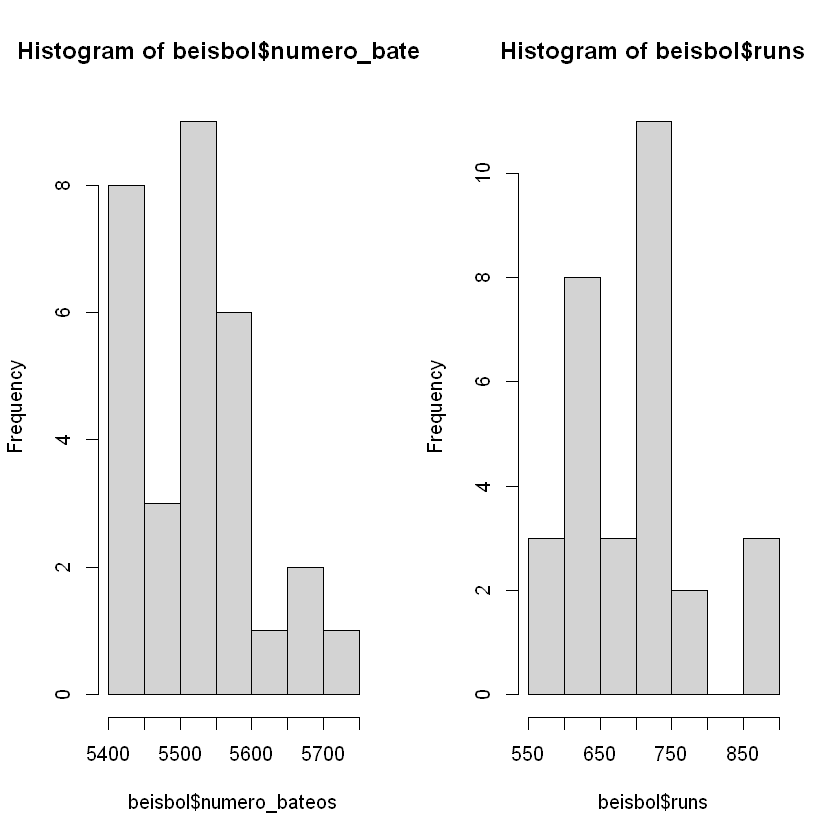

In [ ]:
par(mfrow = c(1, 2))
hist(beisbol$numero_bateos)
hist(beisbol$runs)

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**Contraste de bondad de ajuste**

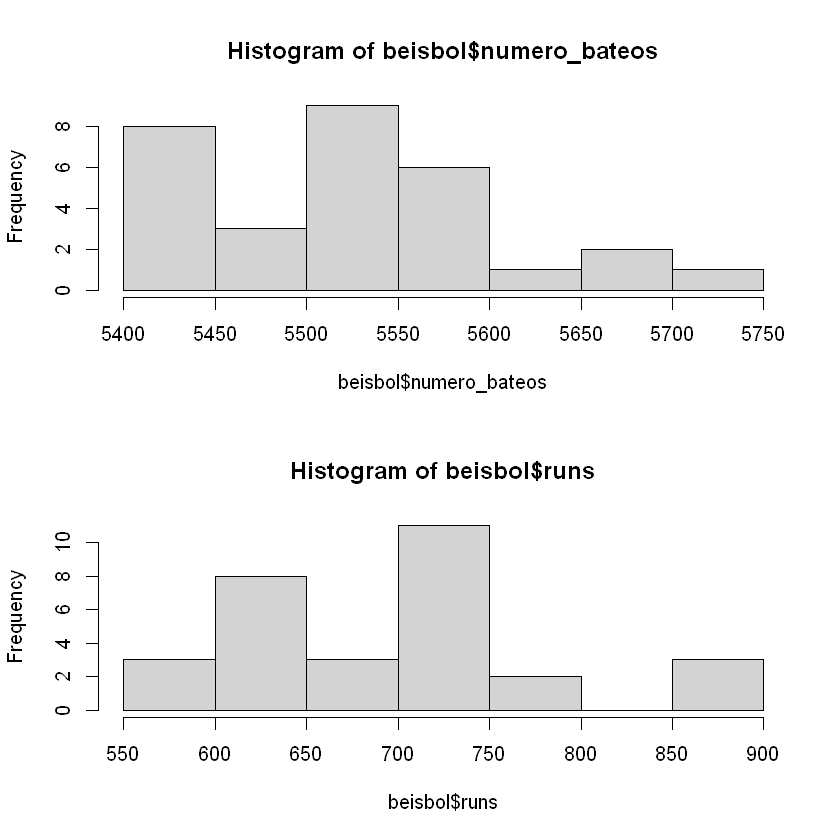

In [ ]:
#Volvemos a generar nuestros histogramas
par(mfrow = c(2, 1))
hist(beisbol$numero_bateos)
hist(beisbol$runs)

Podemos notar que, como se mencionó en el apartado anterior, si bien la distribución de los datos no se apega estrictamente a lo que esperaríamos si dibujamos una curva de distribución normal, esta no se aleja demasiado de este concepto

In [ ]:
#Realizamos nuestro lillie.test para confirmar numéricamente si nuestras columnas siguen una
#distribucion normal, para esto primero tenemos que cargar la libreria nortest
library(nortest)
lillie.test(beisbol$numero_bateos)
lillie.test(beisbol$runs)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  beisbol$numero_bateos
D = 0.11465, p-value = 0.4004



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  beisbol$runs
D = 0.11776, p-value = 0.3583


Una vez aplicado el test de lillie observamos que para ambos casos su p-valor es superior al nivel de significancia del 5%, dado esto **NO** rechazamos nuestra hipótesis nula, es decir que ambas columnas siguen una distribución de tipo normal

**Contraste para la media**

In [ ]:
#Una vez tenemos reconocida nuestra distribucion vamos a realizar los contrastes para la media.
#pero primero necesitamos realizar el test de Bartlett para escoger entre contraste
#paramétrico o no paramétrico
bartlett.test(list(beisbol$numero_bateos,beisbol$runs))


	Bartlett test of homogeneity of variances

data:  list(beisbol$numero_bateos, beisbol$runs)
Bartlett's K-squared = 0.029381, df = 1, p-value = 0.8639


Realizado nuestro test de Barlett obtenemos un p-valor mucho mas alto que el 5% por lo cual **NO** rechazamos nuestra hipótesis nula y podemos decir que nuestras varianzas no difieren significativamente entre si, lo que nos da paso a poder realizar un contraste para la media de tipo **paramétrico**

In [ ]:
#Realizamos el test T de tipo paramétrico
t.test(beisbol$numero_bateos,beisbol$runs)


	Welch Two Sample t-test

data:  beisbol$numero_bateos and beisbol$runs
t = 230.41, df = 57.94, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4787.939 4871.861
sample estimates:
mean of x mean of y 
   5523.5     693.6 


Según nuestro test t de contraste para medias obtenemos que existe una clara diferencia entre la media de nuestro numero de bateos y la media del numero de carreras, esto dado por nuestro estadístico *p* el cual es mucho menor al 5%

**Contraste de correlacion**

In [ ]:
#Terminamos los contrastes de hipótesis con el contraste de correlación, para este caso
#usaremos el contraste de correlacion de pearson ya que como hemos demostrado en puntos anteriores
#demostramos que existe normalidad en la distribucion de nuestros valores
cor(beisbol$numero_bateos,beisbol$runs, method = "pearson")

[1] 0.610627

Al ser un contraste entre dos columnas este test nos entrega un solo valor, para este caso específico observamos que es positivo y ligeramente alto por lo que podemos asumir que existe una correlacion entre el número de bateos y las carreras, ahora vamos a contrastar este valor calculando su significatividad lo cual nos dirá si podemos tomar por cierto este valor o no

In [ ]:
cor.test(beisbol$numero_bateos,beisbol$runs, method = "pearson")


	Pearson's product-moment correlation

data:  beisbol$numero_bateos and beisbol$runs
t = 4.0801, df = 28, p-value = 0.0003388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3209675 0.7958231
sample estimates:
     cor 
0.610627 


De acuerdo al resultado de nuestro test de correlacion obtenemos un p-valor mucho menor al 5%, en consecuencia podemos **rechazar** nuestra hipótesis nula en favor de la hipótesis alternativa siendo entonces que si existe una relación positiva fuerte entre el número de bateos y el número de carreras obtenidas en la temporada, entonces, entre mas bateos se presenten por equipo, mas carreras se lograran en la temporada

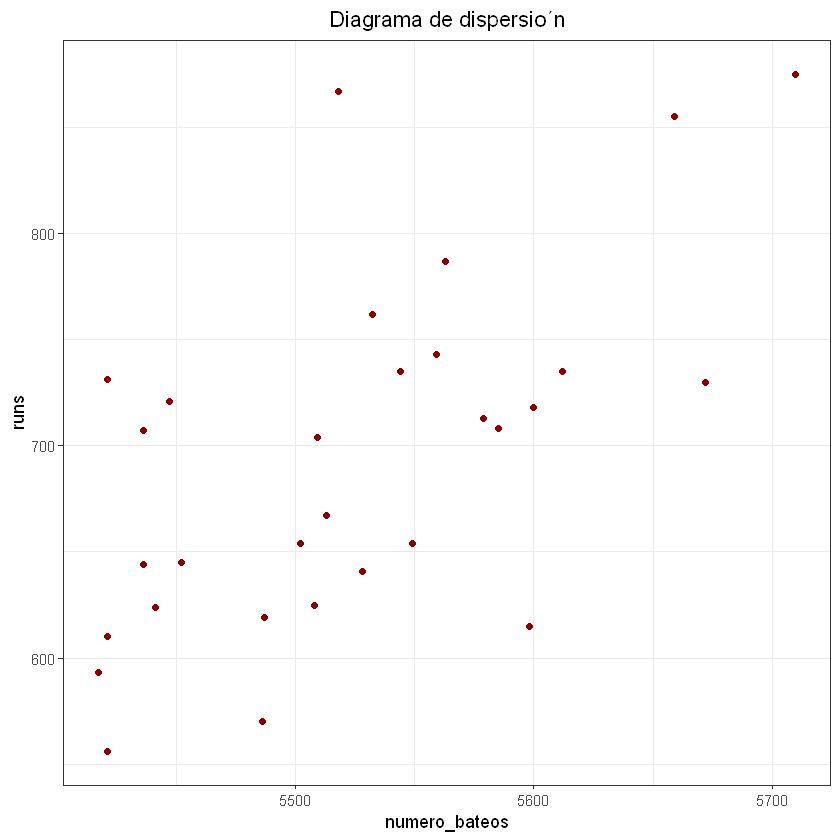

In [ ]:
#Usamos ggplot para poder obtener una vision de esta correlacion.
ggplot(data = beisbol, aes(x = numero_bateos, y = runs)) +
       geom_point(colour = "red4") +
       ggtitle("Diagrama de dispersión") +
       theme_bw() +
       theme(plot.title = element_text(hjust = 0.5))

Confirmamos lo que ya habíamos observado en la etapa de exploracion de datos y es que por la represntacion gráfica de los datos podíamos asumir que existía una relacion positiva entre ellas, ahora ya queda demotrado a través de su coeficiente de correlacion y apoyado en su nivel de significación

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

**Estimacion de modelo de regresion simple**

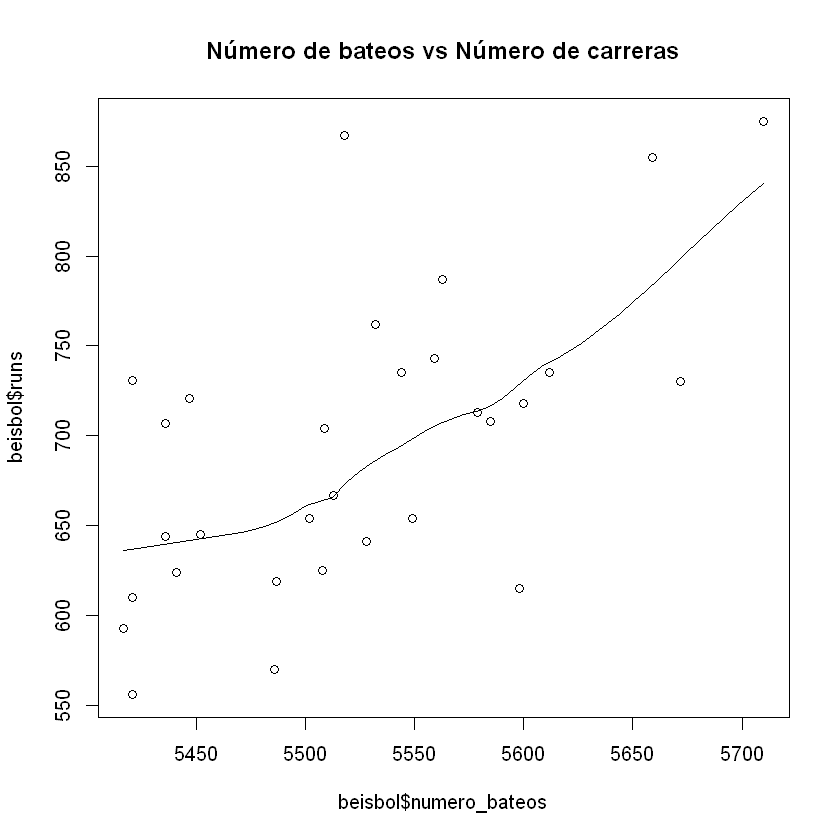

In [ ]:
#Realizamos un gráfico esta vez con scatter el cual además nos dibuja una posible linea de regresión para este conjunto de datos
scatter.smooth(x = beisbol$numero_bateos, y = beisbol$runs, main = "Número de bateos vs Número de carreras")

In [ ]:
#Corremos nuestro modelo de regresion lineal en nuestros datos seleccionados
modelo = lm(beisbol$runs ~ beisbol$numero_bateos)
modelo


Call:
lm(formula = beisbol$runs ~ beisbol$numero_bateos)

Coefficients:
          (Intercept)  beisbol$numero_bateos  
           -2789.2429                 0.6305  


Ya tenemos estimado nuestro modelo de regresion simple, en este caso relacionando el número de carreras vs el número de bateos, siendo -2789.24 el número de carreras cuando existen 0 bateos (lo cual es nuestro intercepto con el eje *x* y en el mundo real no representaría una situación posible) y 0.6305 es el coeficiente de el número de bateos, lo que nos indica que por cada unidad que incremente el número de bateos nuestro número de carreras aumentará en 0.6305

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [ ]:
#Extraemos el resumen de los valores de nuestro modelo
output = summary(modelo)
output


Call:
lm(formula = beisbol$runs ~ beisbol$numero_bateos)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2789.2429   853.6957  -3.267 0.002871 ** 
beisbol$numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


Extraemos un resumen de la informacion de nuestro modelo, y lo guardamos en la variable output, entre los valores que podemos reconocer vemos:  
**1.** La fórmula utilizada *formula = (beisbol $ runs ~ beisbol $ numero_bateos)* es decir que estamos explicando la columna runs en funcion de numero_bateos  
**2.** Los coeficientes de nuestra formula siendo -2789.2429 para beta cero y 0.6305 para beta uno  
**3.** La desviacion estandar 853.6957 para beta cero y 0.1545 para beta uno  
**4.** El estimador t que nos sirve para contrastar nuestra hipótesis nula, en este caso ambos son menores que el 5% lo cual nos dice que el valor estimado como resultado de nuestro modelo lineal es estadísticamente significativo  
**5.** El Residual standard error cuyo valor es 66.47  
**6.** Y los grados de libertad que son iguales a 28

In [ ]:
#Extraemos los coeficientes de nuestro modelo
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2789.24289,853.6957215,-3.267256,0.0028705508
beisbol$numero_bateos,0.63055,0.1545414,4.080136,0.0003388351


Para nuestro modelo de regresion lineal tenemos dos coeficientes estimados siendo -2789.24289 el coeficiente de las carreras y 0.63055 el coeficiente para el numero de bateos, esto nos quiere decir que nuestro valor base si no existiese ningún bateo es de -2789.24289 carreras, mientras que el segundo coeficiente representa la proporción en la cual aumenta el número de carreras por cada incremento en el número de bateos, lo cual confirma que existe una relacion directa entre estas dos columnas.

In [ ]:
#Ahora vamos a obtener los valores estimados de nuestro modelo
head(modelo$fitted.values)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

Los valores estimados son aquellos que nuestro modelo calcula se ajustan mejor a la recta de regresión, no son datos resultado de una predicción si no mas bien los puntos en los cuales el modelo ajusta la recta que de acuerdo a nuestros parámetros se ajusta de mejor manera para explicar los valores de cada observacion, al ser valores estimados se considera que pueden existir variaciones con los valores reales, si observamos los 5 primeros valores de nuestros datos originales vamos a apreciar que difieren de nuestros valores estimados

In [ ]:
head(beisbol)

,equipos,numero_bateos,runs
,<chr>,<dbl>,<dbl>
1,Texas,5659,855
2,Boston,5710,875
3,Detroit,5563,787
4,Kansas,5672,730
5,St.,5532,762
6,New_S.,5600,718


In [ ]:
#Obtenemos los residuos estimados de nuestro modelo
head(modelo$residuals)

1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

Los residuos estimados los podemos entender como la diferencia entre el valor estimado y el valor real, para nuestro ejemplo tenemos valores que están en positivo (siendo aquellos en los que nuestro modelo obtuvo un valor menor al real) y valores que están en negativo (siendo aquellos en los que nuestro modelo tuvo un valor mayor al real). Podemos observar que si sumamos nuestro residuo estimado con el valor estimado por el modelo vamos a obtener el valor real de nuestros datos originales

In [ ]:
#Extraemos los grados de libertad de nuestro modelo
head(output$df)[2]

[1] 28

Los grados de libertad nos muestran basicamente la cantidad de observaciones de nuestro modelo, con la salvedad de que se les resta el numero de parámetros estimados, es decir que para nuestro caso en particular:  

*28 grados de libertad + 2 parámetros estimados = 30 observaciones de nuestro modelo*  

Este valor es importante porque nos permite conocer que tan grande es nuestra base de datos, y nos da una idea de que tan significativo puede ser nuestro modelo.

In [ ]:
#Obtenemos nuestra suma del cuadrado de los residuos
head(output$sigma)

[1] 66.47284

En este caso en particular podemos iniciar notando que este valor es muy alto, lo que sigma nos representa es la variacion que no está siendo explicada por el modelo, es decir que nos hace falta mucha informacion para poder lograr explicar el número de carreras de un equipo en la temporada, lo cual a su vez nos permite inferir que esta variable dependiente no solo responde al número de bateos si no a otras condiciones que no están contempladas en el modelo por falta de información.

In [ ]:
#Volvemos a obtener los coeficientes pero en este caso nos fijamos en el error estandar
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2789.24289,853.6957215,-3.267256,0.0028705508
beisbol$numero_bateos,0.63055,0.1545414,4.080136,0.0003388351


De acuerdo al resultado anterior podemos darnos cuenta que para beta cero nuestro error estandar es muy alto, lo cual nos permite entender que la variabilidad de nuestro numero de carreras es muy alta sin contar el número de bateos y por lo tanto existe muy poca precision en la estimacion de este, mientras que en el caso del número de bateos el error estandar es mucho menor lo cual nos da un poco mas de confianza en el coeficiente estimado, aunque estadísticamente hablando sigue siendo un valor algo alto si tenemos en cuenta la proporcion con el coeficiente estimado.

In [ ]:
#Continuamos con la extracion del R2
output$r.squared

[1] 0.3728654

En este punto podemos observar que este estadístico refuerza la idea de que el número de bateos no logra explicar coompletamente las carreras de un equipo en una temporada, específicamente solo logra explicar el 37.29% de las carreras, lo cual nos deja con un 62.71% de variabilidad en las carreras que tiene como fuente otras variables que no están incluidas en nuestro modelo

In [ ]:
#Obtenemos nuestro R2 ajustado
output$adj.r.squared

[1] 0.3504677

Para este caso en particular nuestro R2 ajustado no significa un gran cambio en nuestro entendimiento del modelo puesto que el R2 se calcula en función de las variables agregadas al modelo, es decir que entre más variables posea mayor va a ser el valor de ajuste, en nuestro caso solo tenemos uno por eso notamos que el ajuste es de aproximadaamente 0.022.

In [ ]:
#Veamos el nivel de confianza de nuestro modelo
confint(modelo)

,2.5 %,97.5 %
(Intercept),-4537.9592982,-1040.5264727
beisbol$numero_bateos,0.3139863,0.9471137


Observamos que nuestro nivel de confianza es demasiado grande para ambas variables, lo que nos explica el nivel de confianza es el intervalo entre los cuales se puede encontrar nuestro coeficiente calculado, para este caso en particular notamos que este rango es muy alto y esto nos dice tambien que tenemos muy poca precision a la hora de calcular nuestros coeficientes

In [ ]:
#Por último calculamos el valor del estadístico F
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
beisbol$numero_bateos,1,73559.33,73559.332,16.64751,0.0003388351
Residuals,28,123721.87,4418.638,NA,NA


A pesar de que este valor ya nos fue entregado cuando hicimos el *summary(output)* es importante volverlo a calcular para tener mas evidencia contrastada de nuestro modelo, ahora, el p-valor de este estadístico nos da la pauta para rechazar la hipótesis nula la cual sugiere que los valores de los coeficientes son estadísticamente iguales. Entonces al rechazar la hipótesis nula podemos afirmar que los valores de nuestros coeficientes **SI** difieren entre sí

### 02 Ejercicio

El archivo de datos `USA.txt` contiene datos demográficos, sociales y económicos de los 50 estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. Estos datos han sido recopilados de diversas fuentes como el United States Census Bureau, el Pew Research Center y el Bureau of Labor Statistics. Explicar variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `grad_univ` que representa el porcentaje de graduados universitarios de cada estado, la variable `afro` que representa el porcentaje de afroamericanos de cada estado, la variable `hispanos` que representa el porcentaje de hispanohablantes de cada estado y la variable `blancos` que representa el porcentaje de personas para cada estado cuya tonalidad de piel es clara. Realizar los siguientes apartados:

1. Cargar el dataset en R y transformarlo en un dataframe
2. Exploración inicial de la base de datos
3. Análisis de la existencia de relación lineal entre las variables seleccionadas
4. Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas
5. Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
#Cargamos nuestro dataset con read.table y lo transformamos en dataframe
usa = read.table("USA.txt", header = TRUE)
head(usa)

,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,...,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,...,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,...,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,...,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,...,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,...,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,...,23,19,2,19,2,10.9,7.8,57255,51.49,9


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**Estructura**

In [ ]:
#Como en esta ocasión no podemos ver la totalidad de los datos directamente,
#verificamos si existen valores nulos en el dataframe
any(is.na(usa))

[1] FALSE

In [ ]:
#Vemos la estructura del dataframe
str(usa)

'data.frame':	51 obs. of  21 variables:
 $ estado        : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 2

Podemos observar que tenemos 21 variables en nuestro dataframe, siendo una de tipo caracter que contiene los nombres de los estados y el resto son de tipo numérico ya sean enteros o decimales y contienen informacion demográfica de cada estado en este periodo de tiempo

In [ ]:
#Verificamos la dimension de nuestro dataframe
dim(usa)

[1] 51 21

Observamos que tenemos 51 observaciones correspondientes a cada uno de los estados y 21 variables de las cuales como ya se dijo 20 corresponden a informacion demográfica y 1 al nombre del estado

**Visualizacion**:  
Nos piden que relacionemos la variable *obama* con 4 variables de nuestro dataframe, antes de pasar a los contrastes estadísticos y a la regresion misma vamos a entender un poco de manera gráfica las posibles relaciones entre estas variables

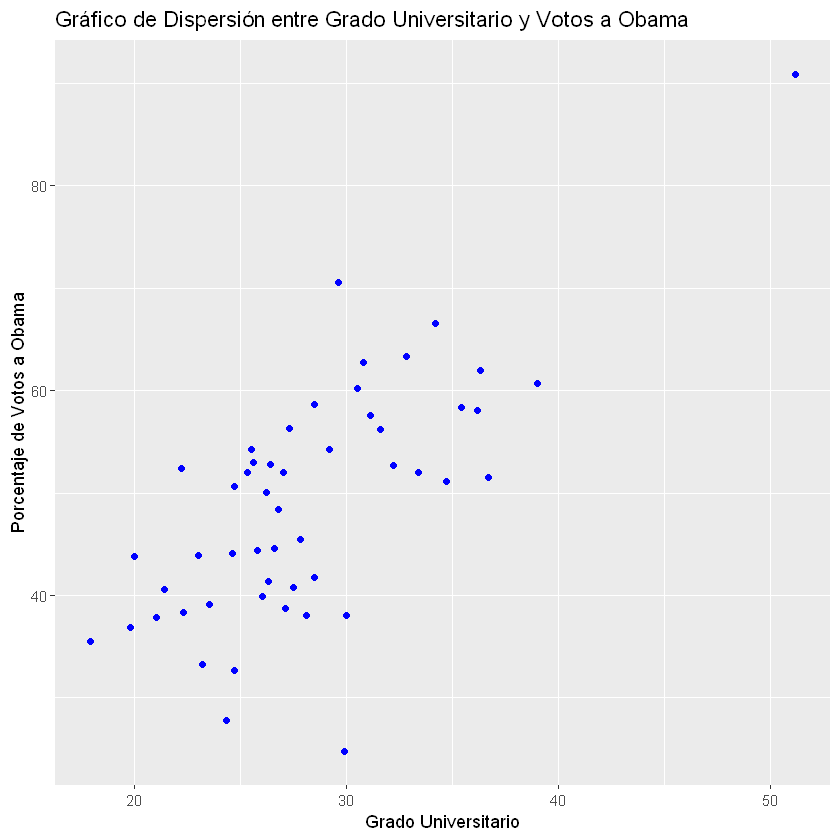

In [ ]:
#Cargamos nuestra libreria ggplot
library(ggplot2)
#Creamos un grafico de dispersion que nos permita entender la relacion entre el grado universitario y
#los votos que recibió obama en este periodo
disp_grad_univ = ggplot(usa, aes(x = grad_univ, y = obama)) +
  geom_point(color = "blue") +
  labs(title = "Gráfico de Dispersión entre Grado Universitario y Votos a Obama", x = "Grado Universitario", y = "Porcentaje de Votos a Obama")
print(disp_grad_univ)

Mirando este gráfico y dada nuestra experiencia en el ejercicio anterior podemos inferir por el momento que si existe una relacion positiva entre el incremento del grado universitario de un estado y la tendencia a tener mas votos para Obama, adicionalmente podemos observar un claro valor atípico en uno de los estados

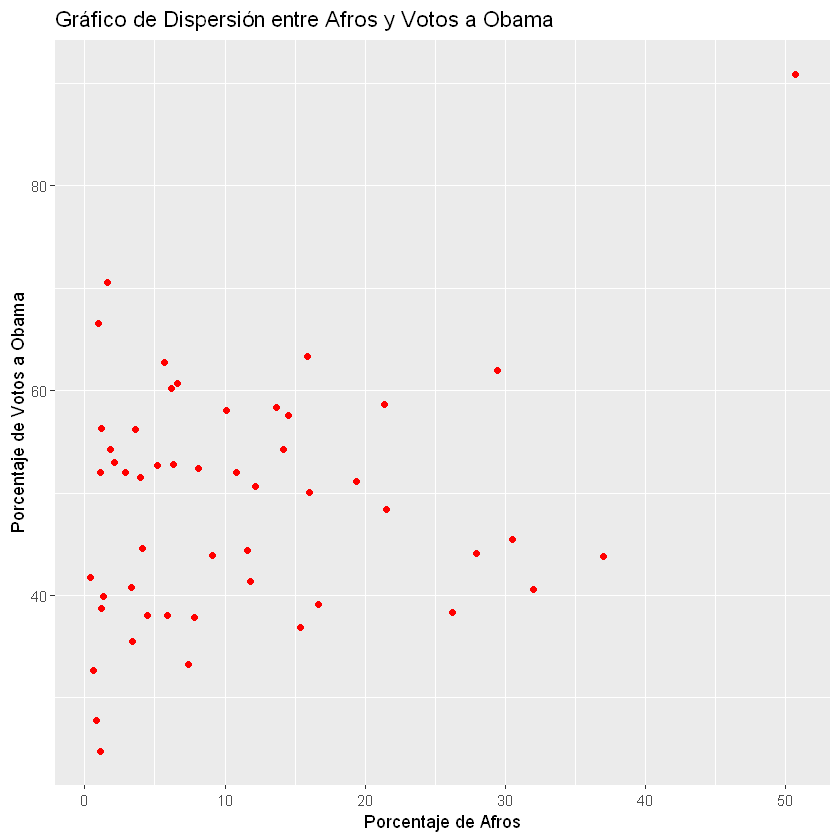

In [ ]:
#Creamos un segundo gráfico para entender la relacion entre afro y obama
disp_afro = ggplot(usa, aes(x = afro, y = obama)) +
  geom_point(color = "red") +
  labs(title = "Gráfico de Dispersión entre Afros y Votos a Obama", x = "Porcentaje de Afros", y = "Porcentaje de Votos a Obama")

print(disp_afro)

En el anterior gráfico podemos notar que aparentemente no existe una relación clara entre los estados que votaron por Obama y su porcentaje de población afro, algo que puede resultar un poco contraintuitivo si hablamos de que el era parte de esta minoria en Estados Unidos, podemos ver que en cuanto se incrementa el porcentaje de poblacion afro, la votación para Obama se mantiene estable o incluso baja, esto contrastado nuevamente con un solo valor atípico que se presenta al igual que en el gráfico del nivel universitario en la esquina superior derecha de nuestro gráfico

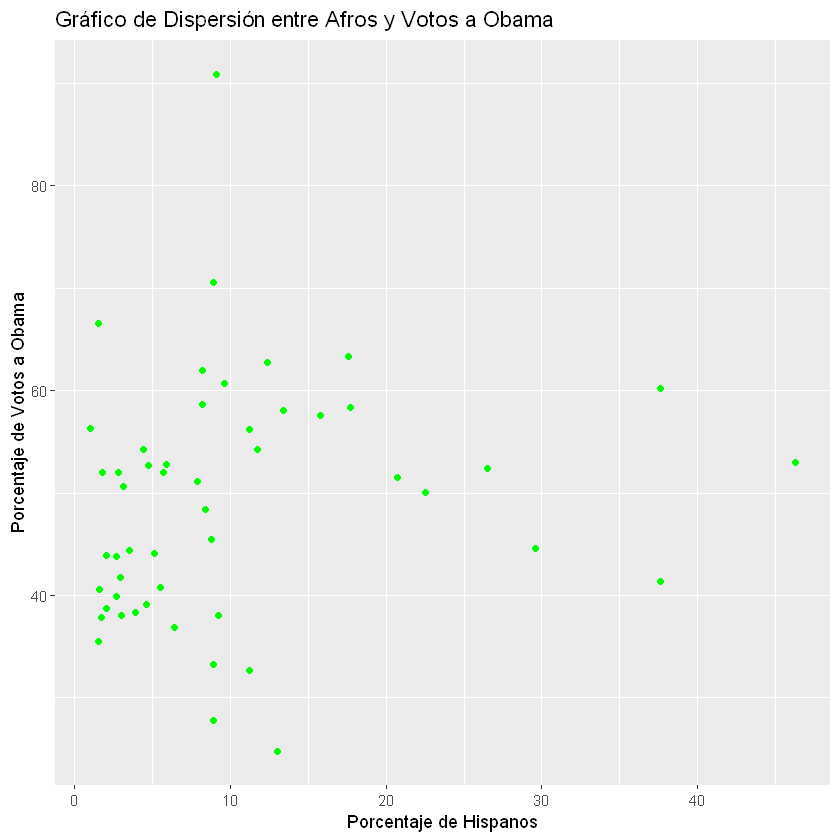

In [ ]:
#Vamos con el tercer gráfico esta vez entre hispanos y obama
disp_hispanos = ggplot(usa, aes(x = hispanos, y = obama)) +
  geom_point(color = "green") +
  labs(title = "Gráfico de Dispersión entre Afros y Votos a Obama", x = "Porcentaje de Hispanos", y = "Porcentaje de Votos a Obama")

print(disp_hispanos)

Aquí tambien podemos notar que al igual que con la poblacion afro, no se evidencia una relación entre este segmento de la población y el porcentaje de votos, de hecho parece ser que esta variable no influyó en la voyacion puesto que la dispersión de los puntos no parece seguir ningun patrón específico

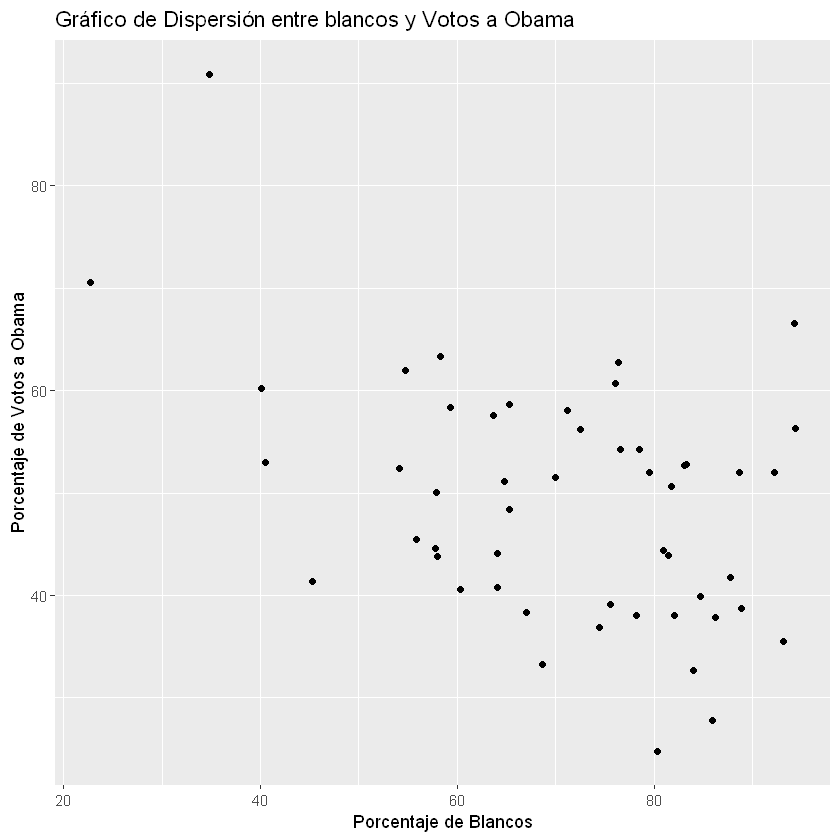

In [ ]:
#Terminamos con un gráfico entre blancos y obama
disp_blancos = ggplot(usa, aes(x = blancos, y = obama)) +
  geom_point(color = "black") +
  labs(title = "Gráfico de Dispersión entre blancos y Votos a Obama", x = "Porcentaje de Blancos", y = "Porcentaje de Votos a Obama")

print(disp_blancos)

En este último caso si logramos ver una relación entre la población blanca de un estado y la cantidad de votos obtenidos por Obama, pero aquí a diferencia de la relación entre Obama y el grado universitario, estamos hablando de una relación inversa es decir que entre mas población blanca tiene un estado la votación recibida por Obama fue menor.

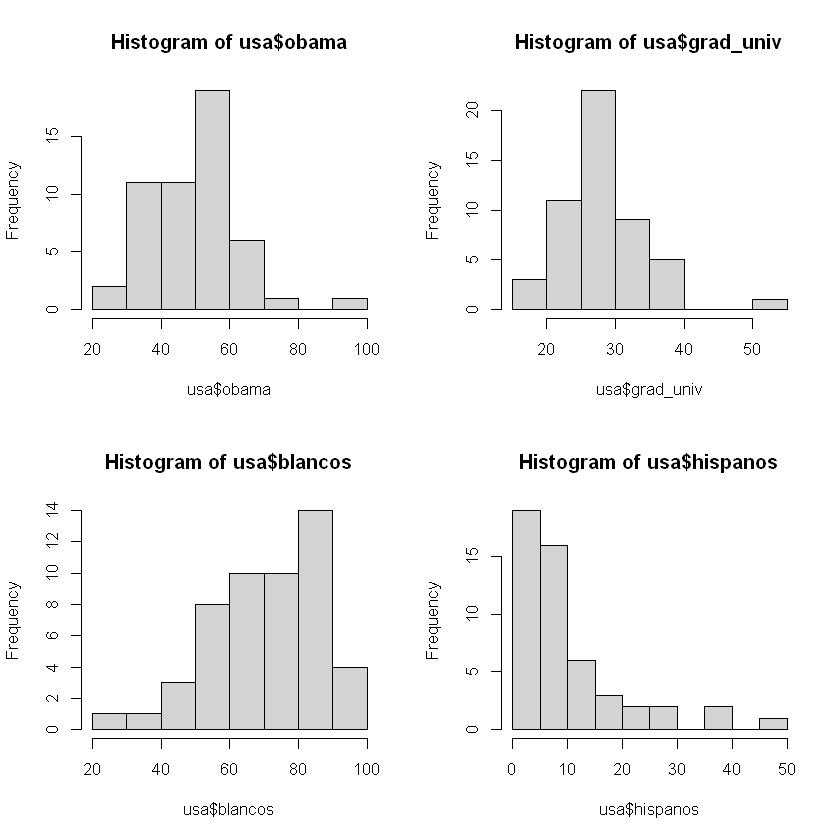

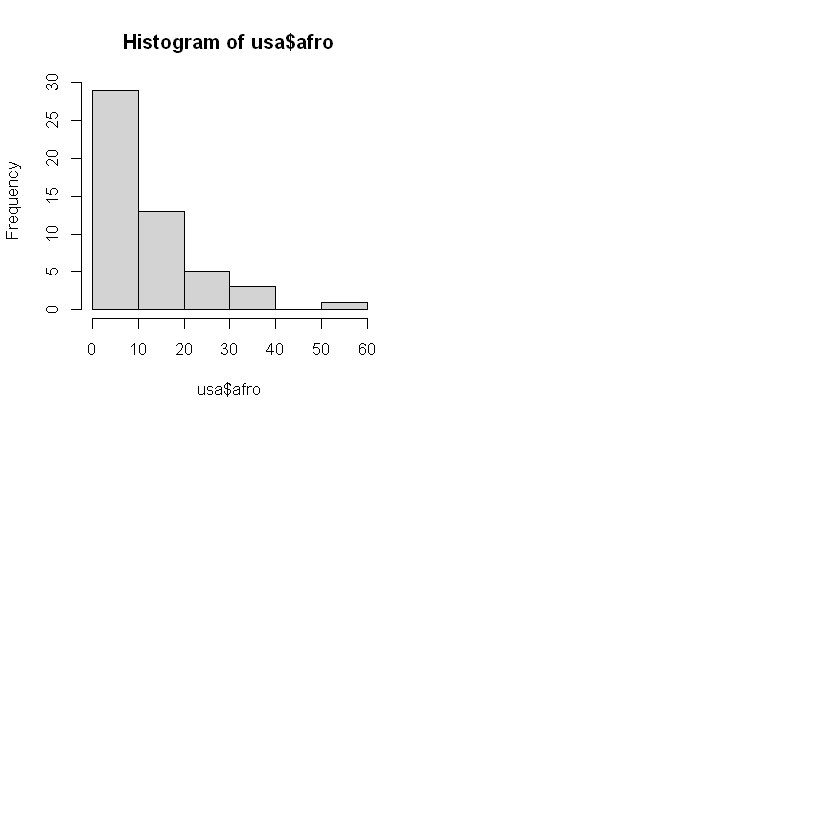

In [ ]:
#Veamos los histogramas de las distintas variables para ver si podemos notar una aproximacion a la distribución normal en las
#variables
par(mfrow = c(2, 2))
hist(usa$obama)
hist(usa$grad_univ)
hist(usa$blancos)
hist(usa$hispanos)
hist(usa$afro)

**Medidas de tendencia central**

In [ ]:
#Creamos un nuevo dataframe que contenga todas las variables que usaremos operar sobre variables numéricas
usa_numeric = subset(usa, select = c("obama","grad_univ","afro","hispanos","blancos"))
head(usa_numeric)

,obama,grad_univ,afro,hispanos,blancos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38.36,22.3,26.2,3.9,67.0
2,40.81,27.5,3.3,5.5,64.1
3,44.59,26.6,4.1,29.6,57.8
4,36.88,19.8,15.4,6.4,74.5
5,60.24,30.5,6.2,37.6,40.1
6,51.49,36.7,4.0,20.7,70.0


In [ ]:
#Vamos a obtener las modas de cada una de las variables de nuestro dataframe
#primero vamos a transformar la columna a una tabla de frecuencias que nos cuente los valores repetidos en cada una
t_obama = table(usa_numeric$obama)
#despues seleccionamos la posicion que tenga el conteo máximo y de aquí tomamos el nombre (que contiene el valor que mas se
#repite en el dataframe) y lo pasamos a formato numérico
moda_obama = as.numeric(names(t_obama)[which.max(t_obama)])
#Repetimos el proceso con todas nuestras variables
t_grad = table(usa_numeric$grad_univ)
moda_grad = as.numeric(names(t_grad[which.max(t_grad)]))
t_afro = table(usa_numeric$afro)
moda_afro = as.numeric(names(t_afro[which.max(t_afro)]))
t_hispanos = table(usa_numeric$hispanos)
moda_hispanos = as.numeric(names(t_hispanos[which.max(t_hispanos)]))
t_blancos = table(usa_numeric$blancos)
moda_blancos = as.numeric(names(t_blancos[which.max(t_blancos)]))

In [ ]:
#Imprimimos los valores de la moda de cada variable junto con su rango
print(paste("La moda para la columna 'obama' es:", moda_obama, "cuyo rango es entre ", min(usa_numeric$obama), "y", max(usa_numeric$obama)))
print(paste("La moda para la columna 'grad_univ' es:", moda_grad, "cuyo rango es entre ", min(usa_numeric$grad_univ), "y", max(usa_numeric$grad_univ)))
print(paste("La moda para la columna 'afro' es:", moda_afro, "cuyo rango es entre ", min(usa_numeric$afro), "y", max(usa_numeric$afro)))
print(paste("La moda para la columna 'hispanos' es:", moda_hispanos, "cuyo rango es entre ", min(usa_numeric$hispanos), "y", max(usa_numeric$hispanos)))
print(paste("La moda para la columna 'blancos' es:", moda_blancos, "cuyo rango es entre ", min(usa_numeric$blancos), "y", max(usa_numeric$blancos)))

[1] "La moda para la columna 'obama' es: 24.75 cuyo rango es entre  24.75 y 90.91"
[1] "La moda para la columna 'grad_univ' es: 24.7 cuyo rango es entre  17.9 y 51.2"
[1] "La moda para la columna 'afro' es: 1.1 cuyo rango es entre  0.4 y 50.7"
[1] "La moda para la columna 'hispanos' es: 8.9 cuyo rango es entre  1 y 46.3"
[1] "La moda para la columna 'blancos' es: 64.1 cuyo rango es entre  22.7 y 94.4"


In [ ]:
#Obtenemos la media de cada una de las variables de nuestro dataframe
media = data.frame(colMeans(usa_numeric))
media

,colMeans.usa_numeric.
,<dbl>
obama,49.02569
grad_univ,28.22941
afro,11.12157
hispanos,10.21373
blancos,70.69608


In [ ]:
#Obtenemos la media de cada una de las vaariables de nuestro dataframe y las mostramos con un texto explicativo
print(paste("La media de la variable 'obama' es de:", median(usa_numeric$obama)))
print(paste("La media de la variable 'grad_univ' es de:", median(usa_numeric$grad_univ)))
print(paste("La media de la variable 'afro' es de:", median(usa_numeric$afro)))
print(paste("La media de la variable 'hispanos' es de:", median(usa_numeric$hispanos)))
print(paste("La media de la variable 'blancos' es de:", median(usa_numeric$blancos)))

[1] "La media de la variable 'obama' es de: 50.67"
[1] "La media de la variable 'grad_univ' es de: 27.1"
[1] "La media de la variable 'afro' es de: 7.4"
[1] "La media de la variable 'hispanos' es de: 8.2"
[1] "La media de la variable 'blancos' es de: 74.5"


**Medidas de posicion**

In [ ]:
#Obtenemos las principales medidas de posicion de nuestro dataframe
summary(usa_numeric)

     obama         grad_univ          afro          hispanos        blancos    
 Min.   :24.75   Min.   :17.90   Min.   : 0.40   Min.   : 1.00   Min.   :22.7  
 1st Qu.:40.23   1st Qu.:24.70   1st Qu.: 3.10   1st Qu.: 3.05   1st Qu.:59.8  
 Median :50.67   Median :27.10   Median : 7.40   Median : 8.20   Median :74.5  
 Mean   :49.03   Mean   :28.23   Mean   :11.12   Mean   :10.21   Mean   :70.7  
 3rd Qu.:56.22   3rd Qu.:30.95   3rd Qu.:15.65   3rd Qu.:12.05   3rd Qu.:82.6  
 Max.   :90.91   Max.   :51.20   Max.   :50.70   Max.   :46.30   Max.   :94.4  

De estas medidas podemos obtener información valiosa acerca de como se distribuye la información, por ejemplo:  
vemos que en las variables obama, grad_univ, afro e hispanos la dispersión entre el primer y tercer cuartil es relativamente poca si vemos sus valores minimos y maximos, esto nos sugiere que podemos estar en presencia de valores atipicos y tambien nos sugiere que la mayoría de los datos se concentran al rededor de la mediana.

Otra observación que podemos hacer es que aunque existen algunas diferencias entre la media y la mediana estas tienden a ser cercanas nuevamente si las comparamos con los valores que toma el modelo.

Además podemos inferir que la distribucion de las variables que representan minorias como afro e hispanos tienden a agruparse mas cerca de el valór mínimo y a su vez la variable blancos tiende mucho mas hacia el valor máximo, esto lo podemos complementar con el histograma que realizamos previamente el cual confirma esta distrubucion de los elementos

**Medidas de dispersion**

In [ ]:
#Obtenemos el rango de nuestras variables
print(paste("El rango de la variable 'obama' es:'",diff(range(usa_numeric$obama))))
print(paste("El rango de la variable 'grad_univ' es:'",diff(range(usa_numeric$grad_univ))))
print(paste("El rango de la variable 'afro' es:'",diff(range(usa_numeric$afro))))
print(paste("El rango de la variable 'hispano' es:'",diff(range(usa_numeric$hispanos))))
print(paste("El rango de la variable 'blancos' es:'",diff(range(usa_numeric$blancos))))

[1] "El rango de la variable 'obama' es:' 66.16"
[1] "El rango de la variable 'grad_univ' es:' 33.3"
[1] "El rango de la variable 'afro' es:' 50.3"
[1] "El rango de la variable 'hispano' es:' 45.3"
[1] "El rango de la variable 'blancos' es:' 71.7"


Si miramos los valores anteriores notamos que todas las variables tienen una gran dispersion si las comparamos con sus valores máximos y mínimos, esto se hace mas evidente en la variable blancos la cual tiene un rango de 71.7 mientras que la menor variabilidad la vemos en grad_univ que es de 33.3, aunque esto se ve afectado por la escala de los datos.

In [ ]:
print(paste("El rango intercuartilico de la variable 'obama' es:", IQR(usa_numeric$obama)))
print(paste("El rango intercuartilico de la variable 'grad_univ' es:", IQR(usa_numeric$grad_univ)))
print(paste("El rango intercuartilico de la variable 'afro' es:", IQR(usa_numeric$afro)))
print(paste("El rango intercuartilico de la variable 'hispanos' es:", IQR(usa_numeric$hispanos)))
print(paste("El rango intercuartilico de la variable 'blancos' es:", IQR(usa_numeric$blancos)))

[1] "El rango intercuartilico de la variable 'obama' es: 15.99"
[1] "El rango intercuartilico de la variable 'grad_univ' es: 6.25"
[1] "El rango intercuartilico de la variable 'afro' es: 12.55"
[1] "El rango intercuartilico de la variable 'hispanos' es: 9"
[1] "El rango intercuartilico de la variable 'blancos' es: 22.8"


Aquí podemos notar un poco mejor que los valores se encuentran agrupados en torno a la media y mediana puesto que el rango intercuartílico no es tan grande como el rango total, esto tambien nos deja ver que existen valores atípicos en todas las variables, aunque es interesante notar que las proporciones, por llamarlo de esa manera, se mantienen siendo la variable blancos la que presenta mayor variabilidad y la variable grad_univ la que menos

In [ ]:
print(paste("La varianza de la variable 'obama' es:", var(usa_numeric$obama)))
print(paste("La varianza de la variable 'grad_univ' es:", var(usa_numeric$grad_univ)))
print(paste("La varianza de la variable 'afro' es:", var(usa_numeric$afro)))
print(paste("La varianza de la variable 'hispanos' es:", var(usa_numeric$hispanos)))
print(paste("La varianza de la variable 'blancos' es:", var(usa_numeric$blancos)))

[1] "La varianza de la variable 'obama' es: 139.498209019608"
[1] "La varianza de la variable 'grad_univ' es: 33.5033176470588"
[1] "La varianza de la variable 'afro' es: 121.467725490196"
[1] "La varianza de la variable 'hispanos' es: 101.903207843137"
[1] "La varianza de la variable 'blancos' es: 261.393184313725"


Confirmamos que se mantiene la variabilidad que hemos visto a través de las otras medidas de dispersión siendo la variable blancos la que tiene el mayor valor y grad_univ la que tiene el menor

In [ ]:
print(paste("La desviacion estandar de la variable 'obama' es:", sd(usa_numeric$obama)))
print(paste("La desviacion estandar de la variable 'grad_univ' es:", sd(usa_numeric$grad_univ)))
print(paste("La desviacion estandar de la variable 'afro' es:", sd(usa_numeric$afro)))
print(paste("La desviacion estandar de la variable 'hispanos' es:", sd(usa_numeric$hispanos)))
print(paste("La desviacion estandar de la variable 'blancos' es:", sd(usa_numeric$blancos)))

[1] "La desviacion estandar de la variable 'obama' es: 11.8109359925286"
[1] "La desviacion estandar de la variable 'grad_univ' es: 5.78820504535377"
[1] "La desviacion estandar de la variable 'afro' es: 11.0212397437945"
[1] "La desviacion estandar de la variable 'hispanos' es: 10.0947118751917"
[1] "La desviacion estandar de la variable 'blancos' es: 16.1676585909564"


Con esto terminamos de confirmar la idea de dispersión de nuestros datos, y podemos afirmar que los que se encuentran menos dispersos son los que pertenecen a grad_univ mientras que la variable blancos es la que tiene mas variacion en cuanto a sus datos

**Medidas de forma**

In [ ]:
print(paste("El coeficiente de asimetria de la variable 'obama' es:",skewness(usa_numeric$obama)))
print(paste("El coeficiente de asimetria de la variable 'grad_univ' es:",skewness(usa_numeric$grad_univ)))
print(paste("El coeficiente de asimetria de la variable 'afro' es:",skewness(usa_numeric$afro)))
print(paste("El coeficiente de asimetria de la variable 'hispanos' es:",skewness(usa_numeric$hispanos)))
print(paste("El coeficiente de asimetria de la variable 'blancos' es:",skewness(usa_numeric$blancos)))

[1] "El coeficiente de asimetria de la variable 'obama' es: 0.674437766197239"
[1] "El coeficiente de asimetria de la variable 'grad_univ' es: 1.23207741467933"
[1] "El coeficiente de asimetria de la variable 'afro' es: 1.42905572981842"
[1] "El coeficiente de asimetria de la variable 'hispanos' es: 1.80500210620654"
[1] "El coeficiente de asimetria de la variable 'blancos' es: -0.760854761463816"


Una vez obtenidos los coeficientes de asimetría de cada una de las variables podemos ver que:  

La variable obama tiene una distribucion asimetrica positiva.
La variable grad_univ tiene una distribucion asimetrica positiva.
La variable afro tiene una distribucion asimetrica positiva.
La variable hispano tiene una distribucion asimetrica positiva.
La variable blancos tiene una distribucion asimetrica negativa.

Esto entonces nos quiere decir que 4 de las 5 variables (*obama,grad_univ,afro,hispano*) tienen la mayoría de sus valores agrupados a la derecha de la media, esto en terminos demográficos nos deja pensar que todos estos grupos son minorías.

Por otro lado notamos que la variable blancos tiene una distribucion asimetrica negativa, es decir que la mayoría de sus valores se encuentran a la izquierda de la media, por tanto siguiendo la lógica que usamos en las anteriores variables asumimos que la poblacion blanca es mayoría en los Estados Unidos.

In [ ]:
print(paste("El coeficiente de curtosis para la variable 'obama' es:",kurtosis(usa_numeric$obama)))
print(paste("El coeficiente de curtosis para la variable 'grad_univ' es:",kurtosis(usa_numeric$grad_univ)))
print(paste("El coeficiente de curtosis para la variable 'afro' es:",kurtosis(usa_numeric$afro)))
print(paste("El coeficiente de curtosis para la variable 'hispanos' es:",kurtosis(usa_numeric$hispanos)))
print(paste("El coeficiente de curtosis para la variable 'blancos' es:",kurtosis(usa_numeric$blancos)))

[1] "El coeficiente de curtosis para la variable 'obama' es: 1.44019587901384"
[1] "El coeficiente de curtosis para la variable 'grad_univ' es: 3.00987549846179"
[1] "El coeficiente de curtosis para la variable 'afro' es: 1.85243421524955"
[1] "El coeficiente de curtosis para la variable 'hispanos' es: 2.93774910053419"
[1] "El coeficiente de curtosis para la variable 'blancos' es: 0.195967141644994"


Si revisamos los coeficientes de curtosis obtenidos podemos reforzar mas la asuncion de que nuestros valores están en general cerca de la media y mediana así como lo vimos con las medidas de dispersión, ya que todos los valores son superiores a 0 es decir leptocurticas, siendo esto mas notable en la variable grad_univ pero igual de notorio en el resto de las variables.

Existe una de ellas que podríamos considerarla mesocurtica por su aproximación a cero, esta es la variable blancos, la cual a lo largo de esta exploracion de los datos ha probado ser una variable que tiene un comportamiento particular con respecto al resto de variables, por lo tanto y viendo las medidas anteriores confirmamos que esta variable es la que mayor dispersión tiene dentro de nuestros datos

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [ ]:
#Volvemos a cargar nuestro dataframe para tener presente sus valores y estructura
usa_numeric = usa[, c("obama", "grad_univ", "afro", "hispanos", "blancos")]
head(usa_numeric)

,obama,grad_univ,afro,hispanos,blancos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38.36,22.3,26.2,3.9,67.0
2,40.81,27.5,3.3,5.5,64.1
3,44.59,26.6,4.1,29.6,57.8
4,36.88,19.8,15.4,6.4,74.5
5,60.24,30.5,6.2,37.6,40.1
6,51.49,36.7,4.0,20.7,70.0


In [ ]:
#Realizamos los test ks para conocer si nuestras variables dependiente e independiente siguen una misma distribucion de probabilidad
ks.test(usa_numeric$obama,usa_numeric$grad_univ)
ks.test(usa_numeric$obama,usa_numeric$blancos)
ks.test(usa_numeric$obama,usa_numeric$afro)
ks.test(usa_numeric$obama,usa_numeric$hispanos)

Warning message in ks.test(usa_numeric$obama, usa_numeric$grad_univ):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  usa_numeric$obama and usa_numeric$grad_univ
D = 0.86275, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(usa_numeric$obama, usa_numeric$blancos):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  usa_numeric$obama and usa_numeric$blancos
D = 0.66667, p-value = 2.864e-10
alternative hypothesis: two-sided


Warning message in ks.test(usa_numeric$obama, usa_numeric$afro):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  usa_numeric$obama and usa_numeric$afro
D = 0.92157, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(usa_numeric$obama, usa_numeric$hispanos):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  usa_numeric$obama and usa_numeric$hispanos
D = 0.90196, p-value < 2.2e-16
alternative hypothesis: two-sided


Despues de realizar el test de Kolmogorov-Smirnov vemos que al parecer ninguna de las variables independientes siguen la misma distribucion de probabilidad, pero como hemos visto todas estas variables tienen media y desviaciones distintas por lo cual podemos estar ante un caso en el cual si tengan distribucion normal pero por esta razón nos genere un p-valor tan pequeño, para confirmar esto vamos a usar otro test que valide o anule el test ks

In [ ]:
#Usamos el lillie tiest para confirmar lo obtenido en el test anterior.
lillie.test(usa_numeric$obama)
lillie.test(usa_numeric$grad_univ)
lillie.test(usa_numeric$afro)
lillie.test(usa_numeric$hispanos)
lillie.test(usa_numeric$blancos)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  usa_numeric$obama
D = 0.07775, p-value = 0.6177



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  usa_numeric$grad_univ
D = 0.10881, p-value = 0.1378



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  usa_numeric$afro
D = 0.16532, p-value = 0.001322



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  usa_numeric$hispanos
D = 0.21051, p-value = 5.898e-06



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  usa_numeric$blancos
D = 0.10937, p-value = 0.1332


Ahora si que podemos contrastar los resultados del test ks con el test lillie, notamos segun nuestros p-valores lo siguiente:  

Nuestra variable dependiente 'obama' si sigue una distribucion normal, al igual que las variables independientes grad_univ y blancos. Las variables afro e hispanos no siguen una distribucion normal.

**Contraste de hipotesis para la media**  
Dado que nuestro contraste de hipótesis de bondad de ajuste nos da como resultado que dos de nuestras variables no siguen una distribución normal, no es posible aplicar test paramétricos por lo que pasamos directamente a los test no paramétricos que se aplican sobre la mediana y no sobre la media

In [ ]:
#Usamos el test de wilcox para contrastar entre nuestras variables dependiente e independientes si su media di
wilcox.test(usa_numeric$obama, usa_numeric$grad_univ, paired = FALSE)
wilcox.test(usa_numeric$obama, usa_numeric$afro, paired = FALSE)
wilcox.test(usa_numeric$obama, usa_numeric$hispanos, paired = FALSE)
wilcox.test(usa_numeric$obama, usa_numeric$blancos, paired = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  usa_numeric$obama and usa_numeric$grad_univ
W = 2490, p-value = 1.753e-15
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  usa_numeric$obama and usa_numeric$afro
W = 2560, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  usa_numeric$obama and usa_numeric$hispanos
W = 2563, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  usa_numeric$obama and usa_numeric$blancos
W = 353, p-value = 2.327e-10
alternative hypothesis: true location shift is not equal to 0


Como vimos en la exploracion de datos ya logramos inferir que existe una diferencia entre las medianas de todas nuestras variables, realizando el test de Wilcoxon que aplica sobre estas mismas ya que no es posible utilizar un test paramétrico podemos utilizando este contraste **RECHAZAR** la hipótesis nula, por lo tanto como conclusion decimos que si existe una diferencia significativa entre las medianas de nuestra variable dependiente y todas las variables independientes, esto soportado en nuestro p-valor resultado de hacer la pruena con cada una de ellas, siendo todos menores que el 5%

In [ ]:
#Aplicamos la funcion cor para obtener nuestra matriz de coeficientes de correlación
cor(usa_numeric, method = "spearman")

,obama,grad_univ,afro,hispanos,blancos
obama,1.0000000,0.6527445,0.13634101,0.28526817,-0.3251731
grad_univ,0.6527445,1.0000000,-0.10738528,0.35439486,-0.1407593
afro,0.1363410,-0.1073853,1.00000000,0.06361456,-0.5872477
hispanos,0.2852682,0.3543949,0.06361456,1.00000000,-0.6358966
blancos,-0.3251731,-0.1407593,-0.58724771,-0.63589663,1.0000000


Dado que nuestra variable dependiente es *obama* vamos a ver los coeficientes de correlacion que tiene con el resto de nuestras variables.

Podemos observar una relacion positiva fuerte con el grado universitario, mientras que la correlacion con afro e hispanos sigue siendo positiva pero mucho mas debil. Por último notamos que la correlacion con la variable blancos es negativa esto quiere decir que para este caso específico si la población blanca de un estado aumenta, la votación para obama va a reducirse

In [ ]:
#Tenemos nuestros coeficientes de correlación, ahora vamos a hacer el contraste de hipótesis para verificar si tienen
#valor estadístico
cor.test(usa_numeric$obama, usa_numeric$grad_univ, method = "spearman")
cor.test(usa_numeric$obama, usa_numeric$afro, method = "spearman")
cor.test(usa_numeric$obama, usa_numeric$hispanos, method = "spearman")
cor.test(usa_numeric$obama, usa_numeric$blancos, method = "spearman")

Warning message in cor.test.default(usa_numeric$obama, usa_numeric$grad_univ, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  usa_numeric$obama and usa_numeric$grad_univ
S = 7674.3, p-value = 2.094e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6527445 


Warning message in cor.test.default(usa_numeric$obama, usa_numeric$afro, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  usa_numeric$obama and usa_numeric$afro
S = 19087, p-value = 0.3401
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.136341 


Warning message in cor.test.default(usa_numeric$obama, usa_numeric$hispanos, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  usa_numeric$obama and usa_numeric$hispanos
S = 15796, p-value = 0.04245
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2852682 


Warning message in cor.test.default(usa_numeric$obama, usa_numeric$blancos, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  usa_numeric$obama and usa_numeric$blancos
S = 29286, p-value = 0.0199
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3251731 


Una vez realizado nuestro test de spearman podemos concluir que aunque tenemos los coeficientes de correlacion para todas las variables, estadísticamente hablando solo podemos afirmar que existe una correlacion entre las variables independientes grad_univ, hispanos y blancos ya que todos tienen un p-valor menor al 5% lo cual nos hace rechazar la hipótesis nula en favor de la alternativa que sugiere que si existe una correlacion entre las variables independientes con la variable dependiente obama.

La variable afro a pesar de que tiene un coeficiente de correlacion esta no se considera estadisticamente significativa según nuestro test de spearman

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

**Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas**

Realizados nuestros analisis anteriores y teniendo en cuenta que para aplicar un modelo de regresion uno de las principales requisitos es que la variable dependiente tenga correlacion con la variable independiente vamos a realizar nuestro modelo con las variables cuya correlación resultó estadisticamente significativa de acuerdo a nuestro contraste de correlación anterior.

In [ ]:
#Aplicamos nuestro modelo de regresion lineal múltiple con las variables que resultaron estadísticamente significativas
modelo = lm(obama ~ grad_univ + hispanos + blancos, data = usa_numeric)
modelo


Call:
lm(formula = obama ~ grad_univ + hispanos + blancos, data = usa_numeric)

Coefficients:
(Intercept)    grad_univ     hispanos      blancos  
    31.9948       1.3181      -0.1661      -0.2614  


Obtenemos así nuestro modelo de regresión lineal múltiple con nuestras 3 variables independientes que guardan correlacion con nuestra variable dependiente

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

In [ ]:
str(modelo)

List of 12
 $ coefficients : Named num [1:4] 31.995 1.318 -0.166 -0.261
  ..- attr(*, "names")= chr [1:4] "(Intercept)" "grad_univ" "hispanos" "blancos"
 $ residuals    : Named num [1:51] -4.865 -9.762 -2.44 -0.673 4.771 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ effects      : Named num [1:51] -350.11 59.75 -5.76 -23.08 5.1 ...
  ..- attr(*, "names")= chr [1:51] "(Intercept)" "grad_univ" "hispanos" "blancos" ...
 $ rank         : int 4
 $ fitted.values: Named num [1:51] 43.2 50.6 47 37.6 55.5 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ assign       : int [1:4] 0 1 2 3
 $ qr           :List of 5
  ..$ qr   : num [1:51, 1:4] -7.14 0.14 0.14 0.14 0.14 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:51] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:4] "(Intercept)" "grad_univ" "hispanos" "blancos"
  .. ..- attr(*, "assign")= int [1:4] 0 1 2 3
  ..$ qraux: num [1:4] 1.14 1 1.29 1
  ..$ pivot: int [1:4] 1 2 3 4
  ..$ tol  : num 1e-07
  ..$ ran

**Extraemos el output de nuestra regresión**

In [ ]:
output = summary(modelo)
output


Call:
lm(formula = obama ~ grad_univ + hispanos + blancos, data = usa_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4779  -4.6450   0.1355   5.8230  14.3982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.99476    9.90541   3.230  0.00226 ** 
grad_univ    1.31815    0.19592   6.728 2.11e-08 ***
hispanos    -0.16608    0.13780  -1.205  0.23413    
blancos     -0.26145    0.08801  -2.971  0.00467 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.771 on 47 degrees of freedom
Multiple R-squared:  0.5931,	Adjusted R-squared:  0.5671 
F-statistic: 22.83 on 3 and 47 DF,  p-value: 2.89e-09


Como ya obtuvimos los valores *resumidos* de nuestro modelo siendo mas faciles de comprender podemos sacar como primeras conclusiones al respecto que:

**1.** Nuestra ecuacion para la regresion integrando coeficientes y variables quedaría de la siguiente manera:    

*obama=31.99476+1.31815×grad_univ−0.16608×hispanos−0.26145×blancos*  

Lo que nos dice que estamos evaluando la variable dependiente "obama" en funcion de las variables indepentientes "grad_univ", "hispanos" y "blancos".

**2.** Los coeficientes de nuestra fórmula, es decir los valores que acompañan a las variables y sirven para expresar cual es la variacion de buestra variable dependiente con cada unidad que se mueva la variable independiente son los siguientes:

*(Intercept): 31.99476, (grad_univ): 1.31815, (hispanos): -0.16608, (blancos): -0.26145*

Es importante notar el peso que tiene grad_univ de manera positiva en este modelo.

**3.** La desviacion estandar es otra de las medidas que nos da nuestro modelo y hace referencia a la dispersion de los datos, en este caso tenemos una desviacion para cada una de las variables:

Desviación estándar de obama (β0): 9.90541
Desviación estándar de grad_univ β1 0.19592
Desviación estándar de hispanos β2: 0.13780
Desviación estándar de blancos β3: 0.08801

**4.** El modelo de regresión lineal múltiple tambien calcula el estimador y nos da la pauta para saber si las variables que ingresan al modelo son estadísticamente significativas, esto lo vemos con su p-valor:

Variable obama (β0): p = 0.00226 es menor a 5% por lo cual es estadísticamente significativa
Variable grad_univ (β1): p = 2.11e-08 es menor a 5% por lo cual es estadísticamente significativa
Variable hispanos (β2): p = 0.23413 es mayor a 5% por lo cual no es estadísticamente significativa
Variable blancos (β3): p = 0.00467 es menor a 5% por lo cual es estadísticamente significativa

Con lo cual a pesar de que hispanos tiene correlación con la variable obama, podemos ver que no tiene un grado de explicación de nuestra variable objetivo que sea reelevante en nuestro modelo.

**5.** El RSE nos da una medida de la diferencia entre los valores estimados de nuestra variable dependiente, para nuestro caso es obama y los valores reales siendo de 7.771, teniendo en cuenta nuestro rango podemos decir que todavía se puede llegar a ajustar este valor ya que las diferencias parecen ser significativas.

**6.** El coeficiente de determinación nos explica cuanto de nuestro modelo logra explicar los cambios en nuestra variable dependiente, según nuestra estimación el modelo solo logra explicar el 59.31% de las variaciones en la votación de obama, esto quiere decir que o bien necesitamos mas datos para nuestro cálculo o tal vez esa diferencia se encuentra explicada por otras variables que no se han incluido en el modelo

**7.** Por último tenemos los grados de libertad que para nuestro caso son 47 ya que es el conteo de nuestras observaciones menos la cantidad de variables utilizadas en nuestro modelo y nuestro estadístico F que por el momento resulta significativo dado su p-valor.

Veamos cada uno de ellos.

**Extraemos nuestros coeficientes de regresión estimados**

In [ ]:
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),31.9947636,9.90541032,3.230029,2.261463e-03
grad_univ,1.3181500,0.19591687,6.728109,2.113953e-08
hispanos,-0.1660848,0.13779863,-1.205272,2.341317e-01
blancos,-0.2614478,0.08801138,-2.970613,4.670602e-03


Obtenemos nuestros coeficientes de cada una de las variables, tomaremos solo la columna *Estimate* la cual nos da los coeficientes e implementandolos en nuestra fórmula tenemos que:

y = β0 + β1×grad_univ + β2×hispanos + β3×blancos

obama = 31.99476 + 1.31815(grad_univ) − 0.16608(hispanos) − 0.26145(blancos)

**Extraemos nuestros valores ajustados**

In [ ]:
print(head(modelo$fitted.values))

       1        2        3        4        5        6 
43.22478 50.57162 47.02976 37.55333 55.46949 58.63157 


Obtenemos los valores estimados de nuestro modelo, es decir estos valores son los que nuestro modelo ha obtenido como resultado del cálculo con la fórmula vista en el punto anterior

**Extraemos los residuos estimados**

In [ ]:
print(head(modelo$residuals))

         1          2          3          4          5          6 
-4.8647777 -9.7616204 -2.4397618 -0.6733324  4.7705066 -7.1415691 


Los valores anteriores corresponden a los residuos de nuestro modelo, que son las diferencias entre los valores estimados que vimos previamente y los valores reales de nuestro modelo

In [ ]:
#Realizamos la suma entre nuestros valores estimados y los residuos
print(print(head(modelo$fitted.values))+print(head(modelo$residuals)))

       1        2        3        4        5        6 
43.22478 50.57162 47.02976 37.55333 55.46949 58.63157 
         1          2          3          4          5          6 
-4.8647777 -9.7616204 -2.4397618 -0.6733324  4.7705066 -7.1415691 
    1     2     3     4     5     6 
38.36 40.81 44.59 36.88 60.24 51.49 


In [ ]:
#Comparamos los valores resultado de la operación anterior y los valores reales de nuestro dataframe
head(usa_numeric["obama"])

,obama
,<dbl>
1,38.36
2,40.81
3,44.59
4,36.88
5,60.24
6,51.49


**Extraemos los grados de libertad**

In [ ]:
head(output$df)[2]

[1] 47

Los grados de libertad los podemos tomar como una medida de robustez en cuanto a nuestras observaciones, estos se calculan tomando la cantidad de observaciones y restandole el número de variables usadas en nuestro modelo.  
Para este caso nuestros grados de libertad son 47, lo cual nos indica que posiblemente nuestra cantidad de observaciones sea insuficiente.

**Extraemos la suma de cuadrados de los residuos**

In [ ]:
output$sigma

[1] 7.770991

Esta medida la podemos entender como la desviacion estandar de los residuos de nuestros valores dependientes estimados versus el valor real de nuestros datos, para nuestro caso este valor es de 7.77 aproximadamente y nos dice la diferencia entre los valores estimados y los valores reales de nuestros datos

**Extraemos los errores de los coeficientes de regresión estimados**

In [ ]:
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),31.9947636,9.90541032,3.230029,2.261463e-03
grad_univ,1.3181500,0.19591687,6.728109,2.113953e-08
hispanos,-0.1660848,0.13779863,-1.205272,2.341317e-01
blancos,-0.2614478,0.08801138,-2.970613,4.670602e-03


Volvemos a sacar nuestra tabla de coeficientes pero esta vez nos vamos a fijar en la columna del error estandar de aquí podemos ver un comportamiento particular, todas nuestras variables independientes tienen un error estandar bajo (grad_univ = 0.19591687, hispanos = 0.13779863, blancos = 0.08801138), lo cual resulta bueno, pero nuestro intercepto tiene un error estandar muy alto lo cual nos deja ver que si bien las variables independientes se están comportando bien, es posible que estemos perdiendo informacion en ciertas variables que no incluimos en nuestro modelo

**Extraemos los coeficientes de determinación**

In [ ]:
#Primero vamos a obtener nuestro R2
output$r.squared

[1] 0.5930772

Como vimos cuando obtuvimos el resumen de nuestro modelo, nuestro valor R2 es de 0.5931, esto nos quiere decir que el modelo es capaz de explicar el 59.31% de los cambios de nuestra variable dependiente en funcion de las variables independientes, pero existe otro coeficiente que nos puede dar un valor mas preciso puesto que el R2 tiende a incrementar cuando incrementa el número de variables.

In [ ]:
#Obtenemos nuestro R2 ajustado
output$adj.r.squared

[1] 0.5671034

Nuestro R2 ajustado tiene la particularidad de que penaliza el valor a obtener mientras la cantidad de variables independientes se incrementa, en este caso nuestro modelo pasa de explicar el 59.31% al 56.71% de los valores obtenidos en nuestras estimaciones, esto implicaría la posiblidad de que hay información relevante en las variables que no se tuvieron en cuenta

**Extraemos los intervalos de confianza**

In [ ]:
confint(modelo)

,2.5 %,97.5 %
(Intercept),12.0676484,51.92187887
grad_univ,0.9240161,1.71228391
hispanos,-0.4432999,0.11113024
blancos,-0.4385038,-0.08439169


Nuestros intervalos de confianza al parecer siguen confirmando la idea de que si bien nuestras variables independientes no presentan una gran variacion, nuestra variable dependiente si lo hace, podemos ver que su intervalo de confianza va desde 12.06 hasta 51.92 lo que significa una gran variabilidad y nos sugiere que tal vez no sea el mejor modelo para predecir sobre nuestra variable dependiente

**Extraemos el estadístico F y su p-valor**

In [ ]:
output$fstatistic[1]

value 
22.83367

In [ ]:
summary(modelo)


Call:
lm(formula = obama ~ grad_univ + hispanos + blancos, data = usa_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4779  -4.6450   0.1355   5.8230  14.3982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.99476    9.90541   3.230  0.00226 ** 
grad_univ    1.31815    0.19592   6.728 2.11e-08 ***
hispanos    -0.16608    0.13780  -1.205  0.23413    
blancos     -0.26145    0.08801  -2.971  0.00467 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.771 on 47 degrees of freedom
Multiple R-squared:  0.5931,	Adjusted R-squared:  0.5671 
F-statistic: 22.83 on 3 and 47 DF,  p-value: 2.89e-09


Podemos ver que nuestro p-valor es menor al 5% lo que nos permite rechazar la hipótesis nula de que los valores de los coeficientes son iguales entre si

### 03 Ejercicio

Utilizando el dataset del ejercicio anterior encontrar de forma automática el mejor modelo de regresión lineal múltiple para explicar la variable `obama` en función del resto de variables excepto `estado`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos:

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
#Volvemos a cargar la estructura de nuestros datos simplemente para tenerlos presentes
str(usa)

'data.frame':	51 obs. of  21 variables:
 $ estado        : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 2

In [ ]:
usa_without_states = subset(usa, select = -estado)

In [ ]:
#Vamos a calcular 20 modelos con las variables que no tuvimos en cuenta en el anterior ejercicio para
#ver si tenemos un mejor ajuste, estos se van a calcular con los pesos de cada uno y con los pesos
#combinados y uno con todas las variables
mod1 = lm(obama ~ salario + paro + jubilados + diputados, data = usa)
mod11 = lm(obama ~ salario * paro * jubilados * diputados, data = usa)
mod2 = lm(obama ~ region + densidad + veteranos + mujeres, data = usa)
mod22 = lm(obama ~ region * densidad * veteranos * mujeres, data = usa)
mod3 = lm(obama ~ mormones + catolicos + protestantes + relig_afro, data = usa)
mod33 = lm(obama ~ mormones * catolicos * protestantes * relig_afro, data = usa)
mod4 = lm(obama ~ salario + densidad + mormones + paro, data = usa)
mod44 = lm(obama ~ salario * densidad * mormones * paro, data = usa)
mod5 = lm(obama ~ paro + veteranos + relig_afro + salario, data = usa)
mod55 = lm(obama ~ paro * veteranos * relig_afro * salario, data = usa)
mod6 = lm(obama ~ jubilados + mujeres + paro + densidad, data = usa)
mod66 = lm(obama ~ jubilados * mujeres * paro * densidad, data = usa)
mod7 = lm(obama ~ diputados + region + catolicos, data = usa)
mod77 = lm(obama ~ diputados * region * catolicos, data = usa)
mod8 = lm(obama ~ veteranos + protestantes + densidad, data = usa)
mod88 = lm(obama ~ veteranos * protestantes * densidad, data = usa)
mod9 = lm(obama ~ relig_afro + mujeres + region, data = usa)
mod99 = lm(obama ~ relig_afro * mujeres * region, data = usa)
mod10 = lm(obama ~ ., data = usa_without_states)

In [ ]:
#Obtenemos los R2 de cada uno de los modelos para ver cuando pueden explicar de la variable dependiente
R2=c(summary(mod1)$adj.r.squared, summary(mod11)$adj.r.squared,summary(mod2)$adj.r.squared,
     summary(mod22)$adj.r.squared,summary(mod3)$adj.r.squared,summary(mod33)$adj.r.squared,
     summary(mod4)$adj.r.squared,summary(mod44)$adj.r.squared,summary(mod5)$adj.r.squared,
     summary(mod55)$adj.r.squared, summary(mod6)$adj.r.squared,summary(mod66)$adj.r.squared,
     summary(mod7)$adj.r.squared,summary(mod77)$adj.r.squared,summary(mod8)$adj.r.squared,
     summary(mod88)$adj.r.squared,summary(mod9)$adj.r.squared,summary(mod99)$adj.r.squared,
     summary(mod10)$adj.r.squared)

In [ ]:
#Obtenemos los criterios de información de akaike
AIC=c(extractAIC(mod1)[2],extractAIC(mod11)[2],extractAIC(mod2)[2],extractAIC(mod22)[2],
      extractAIC(mod3)[2],extractAIC(mod33)[2],extractAIC(mod4)[2],extractAIC(mod44)[2],
      extractAIC(mod5)[2],extractAIC(mod55)[2],extractAIC(mod6)[2],extractAIC(mod66)[2],
      extractAIC(mod7)[2],extractAIC(mod77)[2],extractAIC(mod8)[2],extractAIC(mod88)[2],
      extractAIC(mod9)[2],extractAIC(mod99)[2],extractAIC(mod10)[2])

In [ ]:
#Obtenemos los criterios de informacion bayesianos
BIC=c(extractAIC(mod1,k=log(nrow(usa)))[2],extractAIC(mod11,k=log(nrow(usa)))[2],
      extractAIC(mod2,k=log(nrow(usa)))[2],extractAIC(mod22,k=log(nrow(usa)))[2],
      extractAIC(mod3,k=log(nrow(usa)))[2],extractAIC(mod33,k=log(nrow(usa)))[2],
      extractAIC(mod4,k=log(nrow(usa)))[2],extractAIC(mod44,k=log(nrow(usa)))[2],
      extractAIC(mod5,k=log(nrow(usa)))[2],extractAIC(mod55,k=log(nrow(usa)))[2],
      extractAIC(mod6,k=log(nrow(usa)))[2],extractAIC(mod66,k=log(nrow(usa)))[2],
      extractAIC(mod7,k=log(nrow(usa)))[2],extractAIC(mod77,k=log(nrow(usa)))[2],
      extractAIC(mod8,k=log(nrow(usa)))[2],extractAIC(mod88,k=log(nrow(usa)))[2],
      extractAIC(mod9,k=log(nrow(usa)))[2],extractAIC(mod99,k=log(nrow(usa)))[2],
      extractAIC(mod10,k=log(nrow(usa)))[2])

In [ ]:
#Instalamos la libreria knitr que nos permite generar una tabla para comparar los resultados de
#nuestros criterios de información y la cargamos
install.packages("knitr")
require(knitr)


  There is a binary version available but the source version is later:
      binary source needs_compilation
knitr   1.42   1.45             FALSE



installing the source package 'knitr'


Loading required package: knitr



In [ ]:
Medidas = data.frame(R2,AIC,BIC,row.names=c("modelo1","modelo11","modelo2","modelo22","modelo3","modelo33","modelo4","modelo44","modelo5",
                                           "modelo55","modelo6","modelo66","modelo7","modelo77","modelo8","modelo88","modelo9","modelo99","modelo10"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|         | Coef.R2adj|      AIC|      BIC|
|:--------|----------:|--------:|--------:|
|modelo1  |  0.4497293| 226.1137| 235.7728|
|modelo11 |  0.5726913| 221.2776| 252.1868|
|modelo2  |  0.3786798| 232.3069| 241.9660|
|modelo22 |  0.6297483| 213.9681| 244.8773|
|modelo3  |  0.2814127| 239.7244| 249.3835|
|modelo33 |  0.2792208| 247.9417| 278.8509|
|modelo4  |  0.5770596| 212.6915| 222.3507|
|modelo44 |  0.6318092| 213.6834| 244.5926|
|modelo5  |  0.3424318| 235.1987| 244.8578|
|modelo55 |  0.3207772| 244.9132| 275.8224|
|modelo6  |  0.3978244| 230.7107| 240.3699|
|modelo66 |  0.6184544| 215.5005| 246.4097|
|modelo7  |  0.1773923| 245.7160| 253.4433|
|modelo77 |  0.1123922| 253.0582| 268.5129|
|modelo8  |  0.3230873| 235.7742| 243.5015|
|modelo88 |  0.4674887| 227.0010| 242.4556|
|modelo9  |  0.2594858| 240.3541| 248.0814|
|modelo99 |  0.3919013| 233.7704| 249.2250|
|modelo10 |  0.8300783| 176.0576| 214.6941|

El modelo que mejor explica la variable obama es el que contiene todas las variables independientes, pero veamos cuales de estas sin estadísticamente significativas

In [ ]:
summary(mod10)


Call:
lm(formula = obama ~ ., data = usa_without_states)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0109 -2.2652  0.4366  1.7794 12.4711 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.464e+02  1.747e+02  -0.838 0.408275    
region         -2.145e+00  1.714e+00  -1.251 0.220294    
densidad        2.133e-03  1.155e-03   1.846 0.074472 .  
veteranos       3.909e-01  1.259e+00   0.311 0.758220    
mujeres         1.487e+00  3.250e+00   0.457 0.650507    
grad_instituto  6.418e-01  5.968e-01   1.076 0.290449    
grad_univ       8.180e-01  3.982e-01   2.054 0.048457 *  
afro           -3.334e-02  4.630e-01  -0.072 0.943056    
asia            1.362e+00  4.382e-01   3.107 0.004025 ** 
hispanos        5.531e-01  3.185e-01   1.737 0.092399 .  
blancos         3.252e-01  2.590e-01   1.256 0.218547    
evangelicos    -1.851e-01  1.186e-01  -1.561 0.128653    
protestantes    1.957e-01  1.868e-01   1.048 0.302967    
relig_afro      7.583

Como podemos ver solo tenemos 3 variables que son estadísticamente significativas en este modelo, vamos a tomarlas y entrenar un nuevo modelo sólo con estas variables

In [ ]:
mod101 = lm(formula = obama ~ grad_univ + asia + paro, data = usa)

In [ ]:
R2=c(summary(mod10)$adj.r.squared, summary(mod101)$adj.r.squared)

In [ ]:
AIC=c(extractAIC(mod10)[2],extractAIC(mod101)[2])

In [ ]:
BIC=c(extractAIC(mod10,k=log(nrow(usa)))[2],extractAIC(mod101,k=log(nrow(usa)))[2])

In [ ]:
Medidas = data.frame(R2,AIC,BIC,row.names=c("modelo10","modelo101"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|          | Coef.R2adj|      AIC|      BIC|
|:---------|----------:|--------:|--------:|
|modelo10  |  0.8300783| 176.0576| 214.6941|
|modelo101 |  0.6786103| 197.7849| 205.5122|

Si comparamos nuestra R2 y los criterios de informacion podemos ver que si bien sólo tuvimos en cuenta nuestras variables que eran estadistivamente significativas y redujimos la carga en nuestro modelo, hemos perdido mucha capacidad explicativa de nuestra variable dependiente, esto puede suceder porque existen variables que no son estadísticamente significativas individualmente pero en su conjunto pueden hacer que el modelo se ajuste de una mejor manera, veamos si este es el caso usando automatizacion para encontrar un mejor modelo

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [ ]:
#Volvemos a cargar la estructura de nuestro modelo para tener recordarlo
str(usa)

'data.frame':	51 obs. of  21 variables:
 $ estado        : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 2

In [ ]:
#Entrenamos un modelo con todas las variables menos la variable estado porque tiene tipo chr y nos
#va a generar problemas
model_usa20 = lm(obama ~ .,usa_without_states)

In [ ]:
#Vamos a usar la funcion step con el parámetro direction = "backward" para que a partir de nuestro
#modelo vaya eliminando variables hasta que se alcance el mayor valor AIC
step(model_usa20, direction = "backward")

Start:  AIC=176.06
obama ~ region + densidad + veteranos + mujeres + grad_instituto + 
    grad_univ + afro + asia + hispanos + blancos + evangelicos + 
    protestantes + relig_afro + catolicos + mormones + jubilados + 
    paro + salario + diputados

                 Df Sum of Sq     RSS    AIC
- afro            1      0.12  734.94 174.07
- jubilados       1      1.43  736.24 174.16
- veteranos       1      2.29  737.10 174.22
- catolicos       1      2.81  737.63 174.25
- mujeres         1      4.96  739.78 174.40
- salario         1     24.98  759.80 175.76
- protestantes    1     26.01  760.83 175.83
- grad_instituto  1     27.42  762.24 175.93
- relig_afro      1     28.05  762.87 175.97
- diputados       1     29.04  763.86 176.03
<none>                         734.82 176.06
- region          1     37.10  771.91 176.57
- blancos         1     37.39  772.20 176.59
- evangelicos     1     57.77  792.58 177.92
- hispanos        1     71.48  806.30 178.79
- densidad        1     80.


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = usa_without_states)

Coefficients:
   (Intercept)        densidad         mujeres  grad_instituto       grad_univ  
    -3.263e+02       1.555e-03       5.087e+00       1.056e+00       4.207e-01  
          asia        hispanos     evangelicos        mormones            paro  
     7.629e-01       1.379e-01      -1.596e-01      -3.967e-01       1.854e+00  


In [ ]:
#Ahora vamos a crear un modelo que no contenga ninguna variable independiente
model_usa0 = lm(obama ~ 1, data = usa_without_states)
model_usa0


Call:
lm(formula = obama ~ 1, data = usa_without_states)

Coefficients:
(Intercept)  
      49.03  


In [ ]:
#Usando nuevamente la función step pero esta vez con el parámetro direction = "fordward" vamos a
#agregar variables a nuestro modelo hasta encontrar el modelo que minimize el AIC, tambien le
#pasamos el parámetro scope con el modelo sin variables y el que tiene todas las variables para
#que lo use como una lista de lo que tiene que ir agregando
step(model_usa0, direction = "forward", scope = list(lower = model_usa0, upper = model_usa20))

Start:  AIC=252.83
obama ~ 1

                 Df Sum of Sq    RSS    AIC
+ grad_univ       1    3570.6 3404.3 218.25
+ densidad        1    2378.5 4596.4 233.56
+ mujeres         1    1702.0 5272.9 240.56
+ catolicos       1    1549.6 5425.3 242.02
+ salario         1    1351.1 5623.8 243.85
+ blancos         1    1285.0 5689.9 244.45
+ asia            1    1174.4 5800.5 245.43
+ evangelicos     1    1129.4 5845.5 245.82
+ mormones        1     843.4 6131.5 248.26
+ paro            1     795.7 6179.2 248.65
+ veteranos       1     739.8 6235.1 249.11
+ region          1     578.7 6396.2 250.41
+ afro            1     560.3 6414.6 250.56
<none>                        6974.9 252.83
+ hispanos        1     178.9 6796.1 253.51
+ diputados       1     153.4 6821.5 253.70
+ jubilados       1     100.2 6874.7 254.09
+ relig_afro      1      98.4 6876.5 254.11
+ grad_instituto  1      66.3 6908.6 254.34
+ protestantes    1       2.6 6972.3 254.81

Step:  AIC=218.25
obama ~ grad_univ

        


Call:
lm(formula = obama ~ grad_univ + paro + jubilados + asia + mormones + 
    densidad + evangelicos + mujeres + protestantes, data = usa_without_states)

Coefficients:
 (Intercept)     grad_univ          paro     jubilados          asia  
  -1.365e+02     8.494e-01     2.043e+00     7.263e-01     7.332e-01  
    mormones      densidad   evangelicos       mujeres  protestantes  
  -2.833e-01     1.134e-03    -1.956e-01     2.678e+00     1.972e-01  


In [ ]:
#Ahora tenemos dos fórmulas para nuestros modelos, vamos a entrenarlos y veamos cual de los dos
#nos da un mejor ajuste
model_usab = lm(obama ~ densidad + mujeres + grad_instituto + grad_univ +
    asia + hispanos + evangelicos + mormones + paro, data = usa_without_states)
model_usaf = lm(obama ~ grad_univ + paro + jubilados + asia + mormones +
    densidad + evangelicos + mujeres + protestantes, data = usa_without_states)

In [ ]:
#Extraemos nuestro R2 y los criterios AIC y BIC
R2=c(summary(model_usab)$r.squared, summary(model_usaf)$r.squared)
AIC=c(extractAIC(model_usab)[2],extractAIC(model_usaf)[2])
BIC=c(extractAIC(model_usab,k=log(nrow(usa)))[2],extractAIC(model_usaf,k=log(nrow(usa)))[2])

In [ ]:
Medidas=data.frame(R2,AIC,BIC,row.names=c("modelo usa backward","modelo usa forward"))
names(Medidas)=c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|                    | Coef.R2adj|      AIC|      BIC|
|:-------------------|----------:|--------:|--------:|
|modelo usa backward |  0.8739128| 165.2208| 184.5391|
|modelo usa forward  |  0.8719128| 166.0235| 185.3417|

Ambos modelos nos dan unos valores similares pero vemos que el modelo que usa el enfoque *backward* ligra explicar mejor nuestra variable obama que el que usa el enfoque *fordward*, me parece importante notar que en este modelo se incluyeron variables que según nuestro modelo que contenía a todas resultaron no ser significativas individualmente pero si resultaron serlo en su conjunto para ajustarse al modelo

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [ ]:
summary(model_usab)


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = usa_without_states)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1779  -2.0756   0.1336   1.2912  15.6640 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.263e+02  9.779e+01  -3.336 0.001813 ** 
densidad        1.555e-03  7.079e-04   2.197 0.033738 *  
mujeres         5.087e+00  1.395e+00   3.646 0.000743 ***
grad_instituto  1.056e+00  4.479e-01   2.359 0.023195 *  
grad_univ       4.207e-01  2.328e-01   1.807 0.078131 .  
asia            7.629e-01  1.269e-01   6.012 4.16e-07 ***
hispanos        1.379e-01  1.048e-01   1.316 0.195527    
evangelicos    -1.596e-01  8.063e-02  -1.979 0.054539 .  
mormones       -3.967e-01  8.282e-02  -4.789 2.20e-05 ***
paro            1.854e+00  4.915e-01   3.772 0.000512 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standar

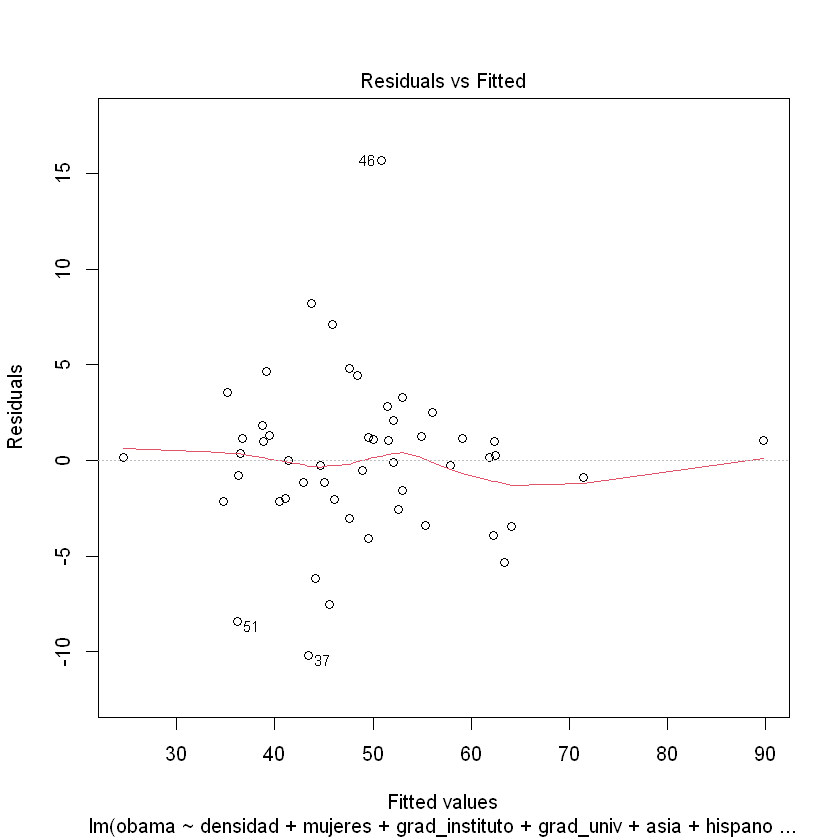

In [ ]:
plot(model_usab, which=1)

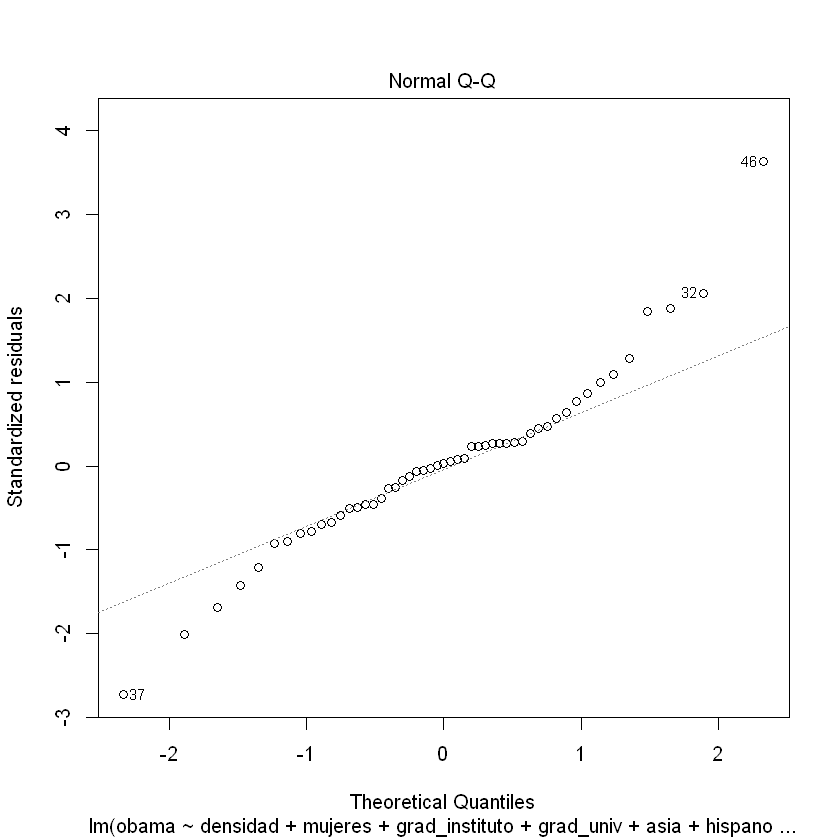

In [ ]:
plot(model_usab, which=2)

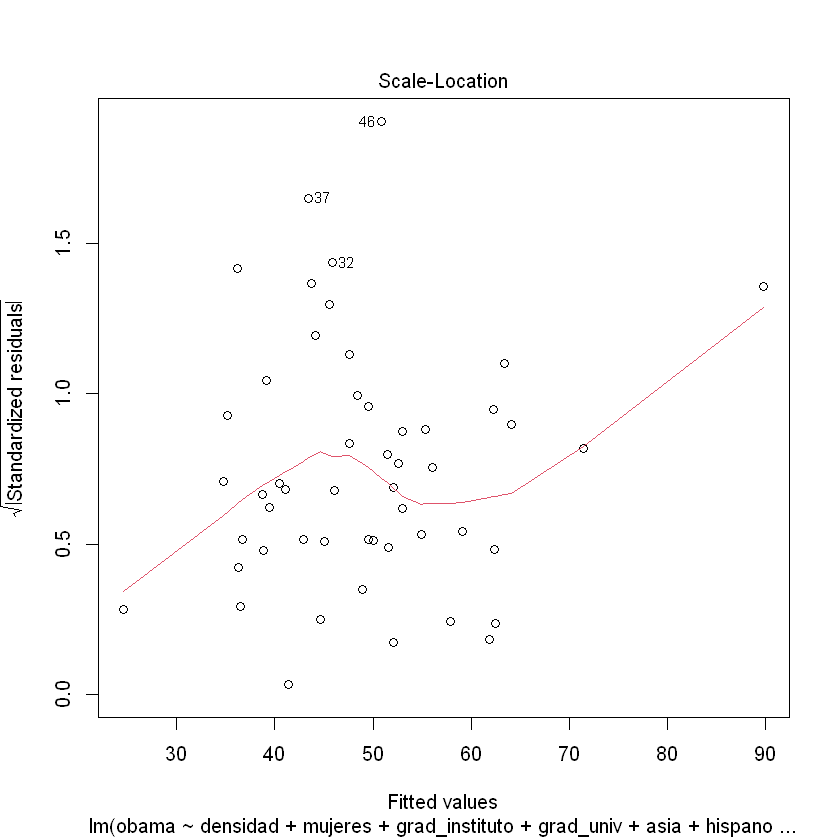

In [ ]:
plot(model_usab, which=3)

Warning message in sqrt(crit * p * (1 - hh)/hh):
"Se han producido NaNs"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"Se han producido NaNs"


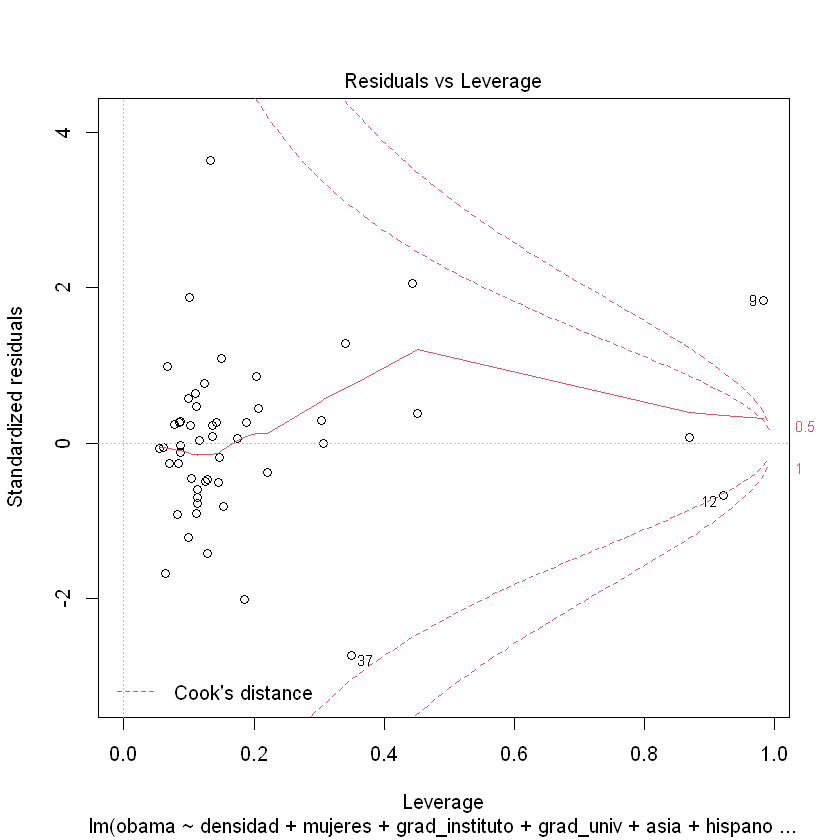

In [ ]:
plot(model_usab, which=5)

In [ ]:
bdata=usa[, c("densidad", "mujeres", "grad_instituto", "grad_univ",
    "asia", "hispanos", "evangelicos", "mormones", "paro")]

In [ ]:
cor(bdata)

,densidad,mujeres,grad_instituto,grad_univ,asia,hispanos,evangelicos,mormones,paro
densidad,1.000000000,0.46583195,-0.00383585,0.6372451158,0.01398511,0.005067992,-0.18730620,-0.08036094,0.1985266715
mujeres,0.465831947,1.00000000,-0.39047508,0.2945415320,-0.15143633,-0.099208396,0.06268464,-0.33579558,0.3712009419
grad_instituto,-0.003835850,-0.39047508,1.00000000,0.3931829947,0.06160028,-0.376128189,-0.49656222,0.17862817,-0.5605433382
grad_univ,0.637245116,0.29454153,0.39318299,1.0000000000,0.18051305,0.128221027,-0.55889734,-0.02207835,-0.0003502951
asia,0.013985112,-0.15143633,0.06160028,0.1805130549,1.00000000,0.176863909,-0.11957990,0.02161304,0.0536920213
hispanos,0.005067992,-0.09920840,-0.37612819,0.1282210271,0.17686391,1.000000000,-0.22423503,0.10665199,0.3383900390
evangelicos,-0.187306203,0.06268464,-0.49656222,-0.5588973395,-0.11957990,-0.224235034,1.00000000,-0.22799088,0.1415075705
mormones,-0.080360944,-0.33579558,0.17862817,-0.0220783481,0.02161304,0.106651990,-0.22799088,1.00000000,-0.1214247656
paro,0.198526672,0.37120094,-0.56054334,-0.0003502951,0.05369202,0.338390039,0.14150757,-0.12142477,1.0000000000


# Bloque 2: Ejercicios intermedios <a id="topic3"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 04 Ejercicio

Utilizando el archivo de datos `hatco.RData` que contiene observaciones de clientes de la compañía de distribución industrial Hatco S.L. Realizar un modelo de regresión lineal múltiple de la variable `fidedila` que representa el porcentaje de compra de los clientes de la empresa Hatco S.L. en función de las siguientes variables explicativas: `velocida` que representa la velocidad de entrega, la variable `precio` que representa el nivel de precios, la variable `flexprec` que representa la flexibilidad de precios, la variable `imgfabri` que representa la imagen del fabricante, la variable `imgfvent` que representa la imagen de fuerza de ventas y la variable `calidadp` que representa la calidad del producto. Responder a las siguientes cuestiones:

1. Ajustar el mejor modelo de regresión lineal múltiple posible con ese conjunto de variables
2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido
3. Realizar una interpretación de los coeficientes del modelo de regresión lineal elegido
4. Realizar la descomposición de valores ajustados y residuos del modelo de regresión lineal elegido
5. Evaluar e interpretar la bondad de ajuste del modelo de regresión lineal elegido ($R^2$ y $R^2_{adj}$)
6. Evaluar e interpretar la prueba de significatividad individual del modelo de regresión lineal elegido
7. Evaluar e interpretar la prueba de significatividad global del modelo de regresión lineal elegido
8. Evaluar e interpretar la multicolinealidad (existencia de relación lineal entre las variables independientes del modelo) usando la matriz de correlaciones

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
#Cargamos la informacion de nuestros datos
load("hatco.RData")

In [ ]:
#Pasamos esta informacion a un dataframe llamado hatco2
hatco2 = as.data.frame(hatco)
head(hatco2)

,empresa,tamano,adquisic,tindustr,tsitcomp,velocida,precio,flexprec,imgfabri,servconj,imgfvent,calidadp,fidelida,satisfac,nfidelid,nsatisfa
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,1,pequeña,descentralizada,clase A,nueva tarea,4.1,0.6,6.9,4.7,2.4,2.3,5.2,32,4.2,medio,bajo
2,2,grande,centralizada,otras industrias,nueva tarea,1.8,3.0,6.3,6.6,2.5,4.0,8.4,43,4.3,medio,bajo
3,3,grande,centralizada,clase A,recompra modificada,3.4,5.2,5.7,6.0,4.3,2.7,8.2,48,5.2,medio,alto
4,4,grande,centralizada,clase A,nueva tarea,2.7,1.0,7.1,5.9,1.8,2.3,7.8,32,3.9,medio,bajo
5,5,pequeña,descentralizada,clase A,recompra directa,6.0,0.9,9.6,7.8,3.4,4.6,4.5,58,6.8,alto,alto
6,6,grande,centralizada,clase A,recompra modificada,1.9,3.3,7.9,4.8,2.6,1.9,9.7,45,4.4,medio,bajo


In [ ]:
#Eliminamos los posibles datos nulos
hatco2 = na.omit(hatco2)

In [ ]:
#Creamos un nuevo datframe que contenga las variables independientes solicitadas
hatco_reg = subset(hatco2, select = c(fidelida, velocida, precio, flexprec, imgfabri, imgfvent, calidadp))

In [ ]:
#Creamos nuestros dos modelos para la automatizacion de la seleccion del mejor modelo, siendo modelo_0 el que contiene
#todas las variables independientes y modelo_1 el que no contiene ninguna
modelo_0 = lm(fidelida ~ velocida + precio + flexprec + imgfabri + imgfvent + calidadp, data = hatco_reg)
modelo_1 = lm(fidelida ~ 1, data = hatco_reg)

In [ ]:
#Iniciamos con nuestro modelo que elimina una a una las variables hasta encontrar el mejor valor AIC
modelo_b = step(modelo_0, direction = "backward")

Start:  AIC=299.64
fidelida ~ velocida + precio + flexprec + imgfabri + imgfvent + 
    calidadp

           Df Sum of Sq    RSS    AIC
- imgfabri  1      0.46 1773.3 297.66
- calidadp  1     27.38 1800.2 299.15
<none>                  1772.8 299.64
- imgfvent  1     44.18 1817.0 300.07
- precio    1   1227.44 3000.3 349.72
- flexprec  1   1449.20 3222.0 356.78
- velocida  1   1670.53 3443.4 363.36

Step:  AIC=297.66
fidelida ~ velocida + precio + flexprec + imgfvent + calidadp

           Df Sum of Sq    RSS    AIC
- calidadp  1     27.52 1800.8 297.19
<none>                  1773.3 297.66
- imgfvent  1    126.49 1899.8 302.48
- precio    1   1267.03 3040.3 349.04
- flexprec  1   1453.32 3226.6 354.92
- velocida  1   1687.80 3461.1 361.87

Step:  AIC=297.19
fidelida ~ velocida + precio + flexprec + imgfvent

           Df Sum of Sq    RSS    AIC
<none>                  1800.8 297.19
- imgfvent  1    155.01 1955.8 303.36
- flexprec  1   1425.81 3226.6 352.92
- precio    1   1462.22 326

In [ ]:
#Ahora usamos la funcion step pero agregando una a una las variables hasta encontrar el mejor valor de AIC
modelo_f = step(modelo_1, direction = "forward", scope = list(lower = modelo_1, upper = modelo_0))

Start:  AIC=434.65
fidelida ~ 1

           Df Sum of Sq    RSS    AIC
+ velocida  1    3558.5 4268.2 376.62
+ flexprec  1    2615.5 5211.3 396.38
+ imgfvent  1     556.9 7269.9 429.34
+ imgfabri  1     394.2 7432.5 431.53
+ calidadp  1     325.8 7501.0 432.44
<none>                  7826.8 434.65
+ precio    1      46.2 7780.6 436.06

Step:  AIC=376.62
fidelida ~ velocida

           Df Sum of Sq    RSS    AIC
+ precio    1    892.61 3375.6 355.39
+ flexprec  1    557.97 3710.3 364.75
+ imgfvent  1    354.86 3913.4 370.03
+ imgfabri  1    287.66 3980.6 371.71
+ calidadp  1    164.23 4104.0 374.74
<none>                  4268.2 376.62

Step:  AIC=355.39
fidelida ~ velocida + precio

           Df Sum of Sq    RSS    AIC
+ flexprec  1   1419.79 1955.8 303.36
+ imgfvent  1    148.99 3226.6 352.92
<none>                  3375.6 355.39
+ imgfabri  1     65.93 3309.7 355.44
+ calidadp  1      4.68 3370.9 357.25

Step:  AIC=303.36
fidelida ~ velocida + precio + flexprec

           Df Sum of

In [ ]:
#Tenemos por tanto 2 modelos, de los cuales a traves de la automatizacion obtuvimos dos que nos representan un mejor valor AIC
#por lo tanto este es el modelo a utilizar.
modelo_br = lm(fidelida ~ velocida + precio + flexprec + imgfvent, data = hatco_reg)
output = summary(modelo_br)
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


Nuestro modelo a usar es el que solo toma en cuenta las variables: *velocida,precio,flexprec y imgfvent* ya que a traves de la automatizacion la funcion step encontro que las variables *imgfabri y calidadp* no reducen el valor AIC

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

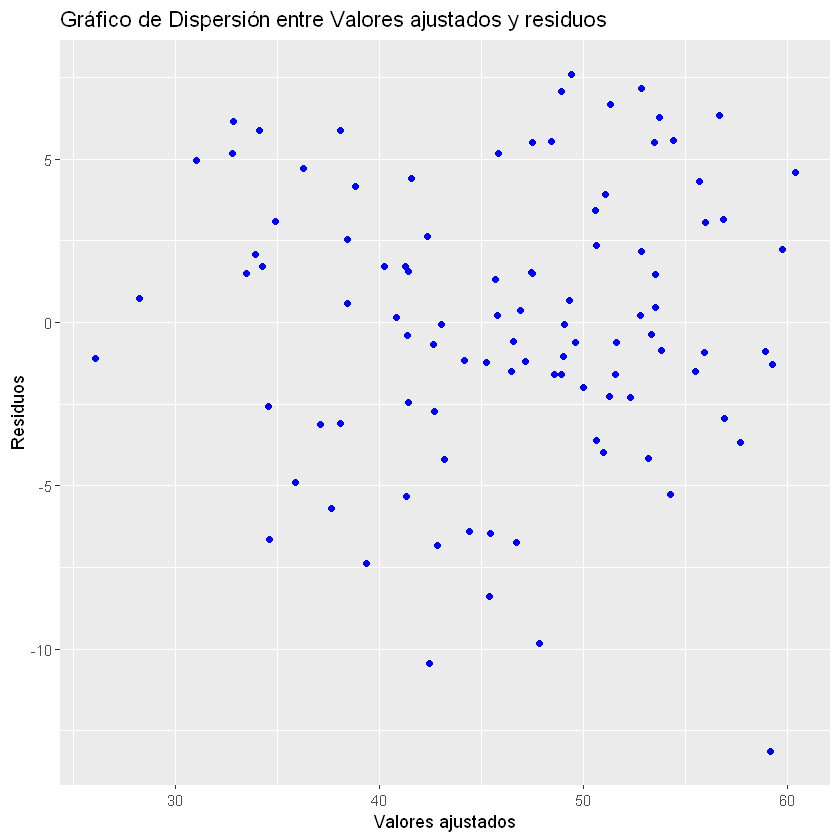

In [ ]:
#Veamos que tambien se ajusta nuestro modelo haciendo una revision a la distriucion de los errores,
#para esto vamos a realizar un grafico de dispersion entre nuestros valores estimados y los residuos
disp_re = ggplot(modelo_br, aes(x = modelo_br$fitted.values, y = modelo_br$residuals)) +
  geom_point(color = "blue") +
  labs(title = "Gráfico de Dispersión entre Valores ajustados y residuos",
       x = "Valores ajustados", y = "Residuos")

print(disp_re)

En el gráfico anterior podemos notar como los residuos están distribuidos de manera aleatoria esto nos quiere decir que nuestro modelo está ajustando de manera adecuada aunque podemos notar una ligera agrupación en la esquina superior derecha lo que podría darnos una idea de que estos puedan aumentar cuando los valores ajustados aumenten. Signo de una posible heterocedasticidad es decir qye la varianza de nuestros errores no sea constante.

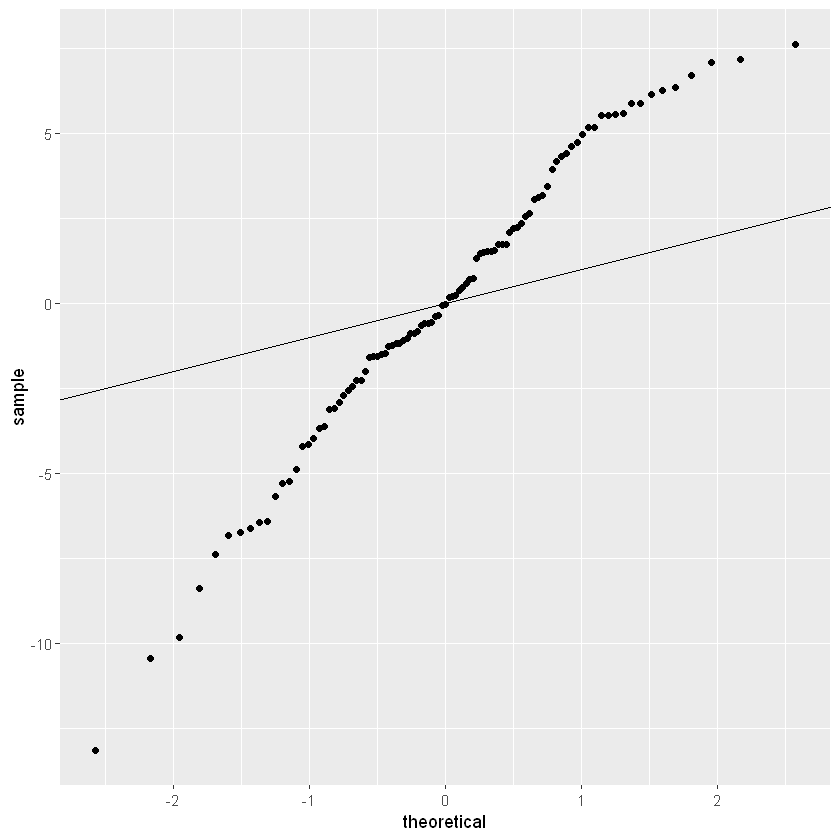

In [ ]:
#Tambien vamos a revisar si se cumple la normalidad de los residuos, para esto podemos usar el grafico QQ en el cual,
#esperaríamos que nuestros puntos se ubiquen sobre la recta
ggplot(data = data.frame(modelo_br$residuals), aes(sample = modelo_br$residuals)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1)

Seguimos con el grafico QQ  en el cual podemos ver que los puntos se encuentran formando una linea recta pero esta se encuentra desviada de nuestra linea dibujada, esto nos da una idea de que nuestros residuos no siguen una distribucion normal.

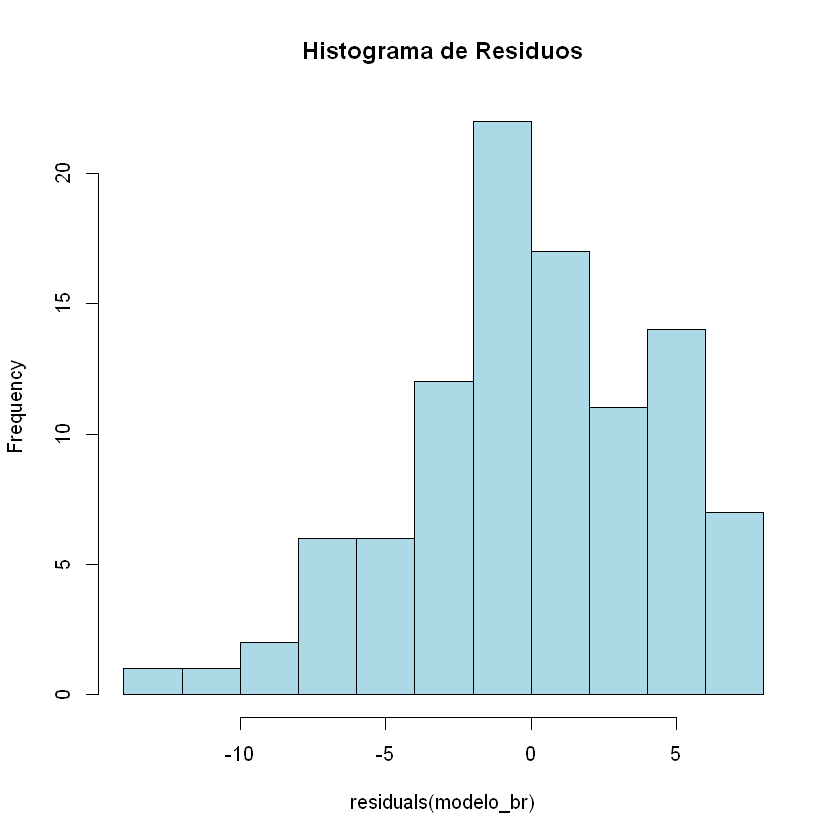

In [ ]:
#Como al parecer los residuos no siguen una distribucion normal vamos a ver su histograma para confirmarlo
hist(residuals(modelo_br), col = "lightblue", main = "Histograma de Residuos")

Realizamos un histograma de nuestros residuos para confirmar la normalidad de los errores y podemos ver que la distribución es asimétrica y tiene una forma acampanada. Esto nos sugiere que los errores pueden no estar distribuidos de forma normal.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [ ]:
#Sacamos el resumen de nuestro modelo y lo guardamos en la variable output
output = summary(modelo_br)
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


In [ ]:
#Obtenemos los coeficientes de nuestro modelo
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-8.006609,3.6860311,-2.172149,3.236015e-02
velocida,3.808208,0.3989488,9.545605,1.700009e-15
precio,3.804574,0.4354810,8.736486,8.910446e-14
flexprec,3.468602,0.4020626,8.627021,1.520074e-13
imgfvent,1.676431,0.5893556,2.844515,5.458472e-03


Para nuestro modelo tenemos que nuestra formula adaptando los coeficientes obtenidos quedaría de la siguiente manera:

**fidelida = -8.006609 + 3.808208(velocida) + 3.804574(precio) + 3.468602(flexprec) + 1.676431(imgfvent)**

lo cual nos quiere decir que por cada unidad que se modifique cada una de nuestras variables independientes nuestra variable fidelida va a cambiar en proporcion al coeficiente que la acompana

In [ ]:
#Obtenemos los grados de libertad
head(output$df)[2]

[1] 94

Como vimos en el apartado anterior nuestros grados de libertad son 94 y se corresponden al total de observaciones menos las 5 variables usadas en la estimacion

In [ ]:
#Extraemos nuestro sigma
head(output$sigma)

[1] 4.376934

In [ ]:
diff(range(hatco_reg$fidelida))

[1] 40

Vemos que en comparacion al rango que maneja la variable fidelida que es nuestra variable dependiente, el sigma obtenido es relativamente pequeno lo que nos da a entender que existe un buen ajuste en el modelo

In [ ]:
confint(modelo_br)

,2.5 %,97.5 %
(Intercept),-15.3253102,-0.6879077
velocida,3.0160855,4.6003299
precio,2.9399160,4.6692314
flexprec,2.6702976,4.2669070
imgfvent,0.5062517,2.8466102


In [ ]:
diff(range(hatco_reg$velocida))
diff(range(hatco_reg$precio))
diff(range(hatco_reg$flexprec))
diff(range(hatco_reg$imgfvent))

[1] 6.1

[1] 5.2

[1] 5

[1] 3.5

Nuevamente podemos observar un intervalo de confianza relativamente bueno para nuestras variables independientes a excepcion de la variable imgfvent que al parecer resulta alto si llo comparamos con el grango que maneja la variable

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [ ]:
#Obtenemos los valores ajustados de nuestro modelo
head(modelo_br$fitted.values)

1        2        3        4        5        6 
37.67893 38.81980 49.02248 34.56299 59.27692 42.37126

In [ ]:
#Obtenemos los residuos de nuestro modelo
head(modelo_br$residuals)

1         2         3         4         5         6 
-5.678934  4.180196 -1.022477 -2.562993 -1.276918  2.628744

In [ ]:
#Sumamos ambos valores para obtener los valores originales
(head(modelo_br$fitted.values) + head(modelo_br$residuals))

1  2  3  4  5  6 
32 43 48 32 58 45

In [ ]:
#Comprobamos que efectivamente tenemos nuestros valores originales
head(hatco_reg["fidelida"])

,fidelida
,<dbl>
1,32
2,43
3,48
4,32
5,58
6,45


<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [ ]:
#Obtenemos nuestros R2 del modelo
output$r.squared

[1] 0.7699162

Como hemos visto en ejercicios anteriores, nuestro R2 quiere decir que el modelo con las variables seleccionadas explica un 76.99% de las variaciones de la variable fidelida, de igual manera podemos entender que hay un 23.01% de informacion que estamos perdiendo y puede estar contenida en otras variables que no se han tenido en cuenta

In [ ]:
#Extraemos nuestro R2 ajustado
output$adj.r.squared

[1] 0.7601254

En este caso es de esperar que su valor baje aunque su variacion no fue mucha ya que no se penaliza tanto el valor de R2 debido a que solo estamos trabajando con 4 variables, las cuales resultaron de la automatizacion para escoger el mejor modelo siendo su nuevo valor 76.01%

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

In [ ]:
#Para poder obtener la significatividad individual de nuestro modelo volvemos a obtener el resumen y lo guardamos en output
output = summary(modelo_br)
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


Vemos que las variables usadas son estadisticamente significativas de acuerdo a su Pr(>|t|) siendo todos menores a 0.05 lo cual nos permite rechazar la hipotesis nula y afirmar que cada una de las variables si tiene un efecto en los cambios de la variable dependiente

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

In [ ]:
#De igual manera para ver su significativiada global obtenemos el estadistico f
output$fstatistic[1]

value 
78.63668

In [ ]:
#Nuevamente revisamos nuestro resumen comparando el estdistico f obtenido y su p-valor
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = hatco_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


Podemos ver que en ambos casos el estadistico F tienen el mismo valor y ademas su p-valor es mucho menor al 5% lo cual nos quiere decir que podemos rechazar la hipotesis nula y popr lo tanto afirmar que todas sus

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

In [ ]:
#Sacamos nuestra tabla de correlacion de la variables independientes
cor(hatco_reg[, c("velocida", "precio", "flexprec", "imgfvent")])

,velocida,precio,flexprec,imgfvent
velocida,1.00000000,-0.3543946,0.51879732,0.08084452
precio,-0.35439461,1.0000000,-0.48550163,0.18873090
flexprec,0.51879732,-0.4855016,1.00000000,-0.03801323
imgfvent,0.08084452,0.1887309,-0.03801323,1.00000000


Vemos que no existe ningun valor que nos haga sospechar una posible correlacion entre las variables independientes usadas en nuestro modelo ya que todas estan por debajo de 0.7 que si bien no es un valor determinado para declarar que existe o no una multicolinealidad es un punto de referencia, podriamos sospechar de la correlacion entre velocida y flexprec que es la mas alta que tenemos pero aunn asi no se considera que exista multicolienalidad en nuestro modelo

### 05 Ejercicio

En este ejercicio deberéis de <u>crear vuestra propia función de R</u> con el objetivo de automatizar el proceso de ajuste de un modelo de regresión lineal múltiple a un conjunto de datos de sección cruzada dado. Es decir, tenéis que replicar la función `lm` de la librería $\tt stats$. Una vez creada, comparar los resultados obtenidos con la propia función `lm` utilizando alguna de las bases de datos propias de las librerías de R teniendo en cuenta los principales objetos de la salida de los modelos: output de la regresión, coeficientes de regresión estimados, residuos estimados, grados de libertad, etc.

Para aplicar a un ejemplo la función que diseñéis podéis utilizar cualquier base de datos disponible en las precargadas de R.

In [ ]:
data(package = .packages(all.available = TRUE))

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 05</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
#Declaramos nuestra funcion de regresion que va a recibir como parametros la formula y los datos
funcion_reg = function(formula, data) {

#Para poder calcular una regresion lineal primero necesitamos obtener las matrices a partir de nuestros datos y poder hacer las
#operaciones pertinentes
    #Primero vamos a obtenes nuestra matriz de diseño X la cual va a contener todos las columnas que se indiquen en la fórmula
    #excepto la variable dependiente que se encuentra antes del signo ~ para este caso va a generar un vector de unos para
    #representar el intercepto.
    X = model.matrix(formula, data)

    #Ya que tenemos nuestra matriz con las variables independientes debemos obtener el vector que contiene la variable
    #dependiente que se llamará Y, para esto usamos model.response que toma la columna que se encuentra antes del signo ~
    #y la convierte en un vector.
    Y = model.response(model.frame(formula, data))


#Una vez que tenemos nuestras matrices para calcular la regresion lineal, vamos a usar el método de Mínimos Cuadrados
#Ordinarios para calcular los coeficientes, este método intenta minimizar la suma de los cuadrados de las diferencias
#entre los valores observados y los valores estimados por el modelo, esto con el fin de poder encontrar la recta que
#se adapte mejor al modelo.

    #Para poder calcular esto necesitamos realizar algunas operaciones con matrices
    #Primero obtenemos la transpuesta de nuestra matriz X
    X_transpuesta = t(X)

    #Ya que tenemos la transpuesta de X vamos a multiplicarla por X PERO CON LA MULTIPLICACION MATRICIAL %*%
    XTX = X_transpuesta %*% X

    #A nuestra matriz resultante le calculamos su inversa, usando la funcion solve()
    IX = solve(XTX)

    #Tambien tenemos que multiplicar la transpuesta de X por el vector Y
    XTY = X_transpuesta %*% Y

    #Una vez que tenemos nuestras matrices calculadas vamos a multiplicar la inversa de X por el resultado de
    #X_transpuesta por Y
    coef = IX %*% XTY

    #Con lo aanterior ya tenemos calculados nuestros coeficientes ahora vamos a calcular los residuos
    #Para esto vamos a restar el resultado de nuestras matriz X por los coeficientes de nuestro vector Y
    residuos = Y - X%*%coef

    #Por ultimo vamos a establecer la salida de nuestra funcion la cual nos va a devolver una lista con los resultados
    #de nuestros coeficientes y nuestros residuos
    output = list(coeficientes = coef, residuos = residuos)

    #Ya que tenemos nuestra funcion calculada tambien podemos asignarle una clase, con el fin de que podamos usar las
    #funciones asignadas a esta clase en un futuro
    #class(output) = "lm"
    return(output)
}


In [ ]:
#Vamos a usar la base de datos UScrime que viene cargada en la libreria MASS
#Primero cargamos la libreria MASS
require(MASS)
#Veamos la estuctura de la base de datos
str(UScrime)

Loading required package: MASS



'data.frame':	47 obs. of  16 variables:
 $ M   : int  151 143 142 136 141 121 127 131 157 140 ...
 $ So  : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed  : int  91 113 89 121 121 110 111 109 90 118 ...
 $ Po1 : int  58 103 45 149 109 118 82 115 65 71 ...
 $ Po2 : int  56 95 44 141 101 115 79 109 62 68 ...
 $ LF  : int  510 583 533 577 591 547 519 542 553 632 ...
 $ M.F : int  950 1012 969 994 985 964 982 969 955 1029 ...
 $ Pop : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW  : int  301 102 219 80 30 44 139 179 286 15 ...
 $ U1  : int  108 96 94 102 91 84 97 79 81 100 ...
 $ U2  : int  41 36 33 39 20 29 38 35 28 24 ...
 $ GDP : int  394 557 318 673 578 689 620 472 421 526 ...
 $ Ineq: int  261 194 250 167 174 126 168 206 239 174 ...
 $ Prob: num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time: num  26.2 25.3 24.3 29.9 21.3 ...
 $ y   : int  791 1635 578 1969 1234 682 963 1555 856 705 ...


In [ ]:
help(UScrime)

In [ ]:
#Guardamos nuestra base de datos en la variable crime y mostamos sus primeros valores
crime = UScrime
head(crime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682


In [ ]:
#Vamos a usar la funcion creada manualmente para evaluar la variable dependiente Prob que mide la probabilidad de entrar a
#prision, y como variables independientes usaremos
#Ed que son los años de escolaridad
#M.F que es el numero de hombres por cada 1000 mujeres
#Pop que es la poblacion del estado
#NW que es la poblacion no blanca
#U1 es la tasa de desempleo urbana de hombres entre 14 y 24 años
#Ineq que es la desigualdad en el  ingreso
mi_regresion = funcion_reg(Prob ~ Ed + M.F + Pop + NW + U1 + Ineq, data = crime)
funcion_regresion = lm(Prob ~ Ed + M.F + Pop + NW + U1 + Ineq, data = crime)

**Evaluacion de coeficientes**

In [ ]:
#Vemos los valores de los coeficientes obtenidos por nuestro modelo hecho a mano
print(mi_regresion$coeficientes)

                     [,1]
(Intercept)  9.734438e-02
Ed           1.982152e-05
M.F         -8.317264e-05
Pop         -2.351768e-04
NW           6.990505e-05
U1           9.741011e-05
Ineq         1.116296e-04


In [ ]:
#Obtenemos los coeficientes resultado de la funcion lm()
print(funcion_regresion$coef)

  (Intercept)            Ed           M.F           Pop            NW 
 9.734438e-02  1.982152e-05 -8.317264e-05 -2.351768e-04  6.990505e-05 
           U1          Ineq 
 9.741011e-05  1.116296e-04 


In [ ]:
#Realizamos una resta entre ambos coeficientes obtenidos
mi_regresion$coeficientes-funcion_regresion$coef

(Intercept),-5.129230e-14
Ed,-1.059469e-17
M.F,5.215012e-17
Pop,1.707618e-17
NW,2.114194e-18
U1,-2.400153e-17
Ineq,4.323256e-18


Podemos comprobar que nuestra funcion obtiene los mismos valores que la funcion lm para los coeficientes del los dos modelos

**Evaluacion de valores estimados**

In [ ]:
#Guardamos nuestros coeficientes en una variable para operar mas facilmente
coeficientes = mi_regresion$coeficientes
#Obtenemos nuestros valores ajustados aplicando la formula con los coeficientes obtenidos de la regresion
yajustado = coeficientes[1]+coeficientes[2]*crime$Ed+coeficientes[3]*crime$M.F+coeficientes[4]*crime$Pop+
            coeficientes[5]*crime$NW+coeficientes[6]*crime$U1+coeficientes[7]*crime$Ineq
head(yajustado)

[1] 0.07307034 0.05049404 0.06665419 0.01431681 0.04396958 0.03879051

In [ ]:
#Obtenemos los coeficientes del modelo usado con la funcion lm
head(funcion_regresion$fitted.values)

1          2          3          4          5          6 
0.07307034 0.05049404 0.06665419 0.01431681 0.04396958 0.03879051

In [ ]:
#Realizamos una resta de los valores obtenidos por nuestra funcion y por el modelo
head(yajustado-funcion_regresion$fitted.values)

1             2             3             4             5 
-2.969847e-15 -7.424616e-16 -2.109424e-15  3.955170e-16 -2.255141e-15 
            6 
-3.143319e-15

Podemos comprobar que para las estimaciones tambien logramos obtener valores iguales entre nuestra funcion y la funcion lm

**Evaluacion de Residuos**

In [ ]:
#Obtenemos los residuos de nuestra funcion
print(head(mi_regresion$residuos))

          [,1]
1  0.011531658
2 -0.020895036
3  0.016746811
4  0.001484191
5 -0.002570579
6 -0.004589508


In [ ]:
#Obtenemos los residuos de la funcion lm
print(head(funcion_regresion$residuals))

           1            2            3            4            5            6 
 0.011531658 -0.020895036  0.016746811  0.001484191 -0.002570579 -0.004589508 


In [ ]:
#Hacemos una resta entre los residuos de nuestra regresion y los residuos de la funcion lm
head(mi_regresion$residuos-funcion_regresion$residuals)

1,2.966377e-15
2,7.424616e-16
3,2.105954e-15
4,-4.024558e-16
5,2.264681e-15
6,3.141584e-15


Podemos ver que nuevamente nuestra funcion logra obtener valores iguales que la funcion lm

**Evaluacion de grados de libertad**

In [ ]:
#Calculamos los grados de libertad de nuestra funcion restando el total de columnas de nuestros datos y la cantidad de variables
#usadas
gdl = nrow(crime)- length(coeficientes)
gdl

[1] 40

In [ ]:
#Obtenemos los grados de libertad de del modelo calculado con la funcion lm
output = summary(funcion_regresion)
head(output$df[2])

[1] 40

In [ ]:
#Restamos los grados de libertad calculados por nosotros y los obtenidos de la funcion lm
gdl-head(output$df[2])

[1] 0

Observamos que tenemos como resultado los mismos grados de libertad en ambos modelos

**Evaluacion de sigma**

In [ ]:
#Calculamos el sigma de nuestro modelo de forma manual
sigma = sqrt(sum(((mi_regresion$residuos)^2)/gdl))
sigma

[1] 0.01943999

In [ ]:
#Obtenemos el sigma de calculado por la funcion lm
output$sigma

[1] 0.01943999

In [ ]:
#Restamos nuestro sigma calculado manualmente y el sigma obtenido por la funcion lm
sigma-output$sigma

[1] 3.469447e-18

Nuevamente vemos que los sigmas de nuestra funcion y la funcion lm no difieren uno del otro

**Evaluacion de los errores de los parametros estimados**

In [ ]:
#Sacamos la matriz varianza-covarianza
crime1 = subset(crime, select = c(Ed,M.F,Pop,NW,U1,Ineq))
y = crime[,1]
X = as.matrix(cbind(cte=1,crime1))

varcov = sigma^2 * solve(t(X) %*% X)

se2 = sqrt(diag(varcov))
print(se2)

         cte           Ed          M.F          Pop           NW           U1 
1.177359e-01 4.917463e-04 1.384316e-04 8.679951e-05 4.129223e-05 1.798689e-04 
        Ineq 
1.297386e-04 


In [ ]:
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.734438e-02,1.177359e-01,0.82680262,0.413254032
Ed,1.982152e-05,4.917463e-04,0.04030843,0.968047755
M.F,-8.317264e-05,1.384316e-04,-0.60082102,0.551348767
Pop,-2.351768e-04,8.679951e-05,-2.70942517,0.009874795
NW,6.990505e-05,4.129223e-05,1.69293473,0.098243732
U1,9.741011e-05,1.798689e-04,0.54156163,0.591124490
Ineq,1.116296e-04,1.297386e-04,0.86041962,0.394685833


In [ ]:
se2-output$coef[,2]

cte            Ed           M.F           Pop            NW 
-9.367507e-15  2.276825e-18 -6.965999e-18 -1.301043e-18 -6.776264e-20 
           U1          Ineq 
 3.523657e-19  5.692061e-19

Como vemos la diferencia de nuestros errores de los parámetros estimados del modelo lm versus el de nuestra función es prácticamente cero

**Evaluacion de los coeficientes de determinación**

In [ ]:
#Vamos a calcular el coeficiente de determinacion de nuestra funcion creada
#Primero vamos a calcular la suma de los cuadrados de los residuos
SCRc = sum(mi_regresion$residuos^2)
#Despues calculamos la suma de los cuadrados de los valores totales es decir cada valor de los datos originales menos la media
SCTc = sum((crime$Prob - mean(crime$Prob))^2)
#Por ultimo dividimos la suma del cuadrado de los residuos entre la suma de los cuadrados de los valores totales y ese resultado
#lo restamos de 1
R2c = 1 - (SCRc / SCTc)
R2c

[1] 0.3643341

In [ ]:
#Extraemos el coeficiente de determinacion calculado por la funcion lm
output$r.squared

[1] 0.3643341

In [ ]:
#Restamos nuestro R2 calculado del resultado de nuestra función menos el extraido de lm
R2c-output$r.squared

[1] 0

Nuevamente obtenemos cero como diferencia entre los dos valores

**Evaluacion de los coeficientes de determinacion ajustados**

In [ ]:
# Vamos a calcular nuestro R2 ajustado de nuestra funcion creada
#Primero tenemos que obtener el numero de filas que se usaron en el modelo y lo nombramos n
n = nrow(crime)
#Despues tomamos el numero de coeficientes usados en el modelo
k = length(coeficientes) - 1
#Calculamos el R2 ajustado usando su funcion
R2_ajustado = 1 - ((1 - R2) * ((n - 1) / (n - k - 1)))
R2_ajustado

[1] 0.8549997 0.8526997

In [ ]:
#Extraemos el R2 ajustado de la funcion lm
output$adj.r.squared

[1] 0.2689842

In [ ]:
R2_ajustado-output$adj.r.squared

[1] 0.5860156 0.5837155

Por último encontramos que la diferencia entre ambos coeficientes es cero

**CONCLUSIONES**  
Podemos concluir entonces que se ha logrado en cierta forma replicar el funcionamiento de la función *lm* de la libreria *stats*, haciendo la comparación entre valores estimados y tambien el cálculo de los principales coeficientes obtuvimos como diferencia cero o valores que se pueden considerar practicamente cero, esto como ejercicio está bien para comprender el funcionamiento de la función, pero en la práctica lm contiene muchas ventajas que simplifican el trabajo con funciones lineales.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>